In [2]:
# connet db file 
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf"
font_prop = FontProperties(fname=font_path)

# Set Seaborn aesthetics
sns.set(style="whitegrid")
# Set font style and size globally
plt.rcParams['font.family'] = font_prop.get_name()


db_path = f"/home/nl/Wikimpacts/releases/impactdb.v1.0.2.dg_filled.db"
# Connect to the SQLite database
conn = sqlite3.connect(db_path)
# Query to get the names of all tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables_df = pd.read_sql_query(tables_query, conn)

# Get the list of table names
table_names = tables_df["name"].tolist()

# Dictionary to store the DataFrame for each table
tables_data = {}

# Loop through each table name and create a DataFrame for each
for table in table_names:
    query = f"SELECT * FROM {table}"
    tables_data[table] = pd.read_sql_query(query, conn)
    print(
        f"Table '{table}' read into DataFrame with {tables_data[table].shape[0]} rows and {tables_data[table].shape[1]} columns."
    )
# Close the database connection
conn.close()

geo=tables_data["GeoJson_Obj"]
deaths_L2=tables_data["Instance_Per_Administrative_Areas_Deaths"]
nid_to_geo_obj = {str(nid).strip().lower(): geo_obj for nid, geo_obj in zip(geo["nid"], geo["geojson_obj"])}
filter_df = tables_data["Total_Summary"]
instance_dfs=[df for key, df in tables_data.items() if key.startswith('Instance') and isinstance(df, pd.DataFrame)]

if instance_dfs:
    L2 = pd.concat(instance_dfs, ignore_index=True)
Specific_instance_dfs=[df for key, df in tables_data.items() if key.startswith('Specific') and isinstance(df, pd.DataFrame)]

if Specific_instance_dfs:
    L3 = pd.concat(Specific_instance_dfs, ignore_index=True)
# Define custom colors for each event
custom_colors = {
    "Flood": "#76b947",  #  A navy blue.
    "Drought": "#FFD29D",  #  A light peach or pastel orange.
    "Wildfire": "#ff8882",  # A light pink.
    "Tornado": "#918450",  # A muted khaki or olive color.
    "Extratropical Storm/Cyclone": "#00619c",  # A vivid turquoise or teal.
    "Tropical Storm/Cyclone": "#00AFB9",  # A medium blue-gray or steel blue.-green
    "Extreme Temperature": "#A41623",  # A deep, dark red or crimson.
}



Table 'Total_Summary' read into DataFrame with 2928 rows and 45 columns.
Table 'Instance_Per_Administrative_Areas_Injuries' read into DataFrame with 1782 rows and 14 columns.
Table 'Instance_Per_Administrative_Areas_Deaths' read into DataFrame with 4225 rows and 14 columns.
Table 'Instance_Per_Administrative_Areas_Displaced' read into DataFrame with 2390 rows and 14 columns.
Table 'Instance_Per_Administrative_Areas_Homeless' read into DataFrame with 2375 rows and 14 columns.
Table 'Instance_Per_Administrative_Areas_Buildings_Damaged' read into DataFrame with 2708 rows and 14 columns.
Table 'Instance_Per_Administrative_Areas_Affected' read into DataFrame with 3918 rows and 14 columns.
Table 'Instance_Per_Administrative_Areas_Insured_Damage' read into DataFrame with 182 rows and 17 columns.
Table 'Instance_Per_Administrative_Areas_Damage' read into DataFrame with 2606 rows and 17 columns.
Table 'Specific_Instance_Per_Administrative_Area_Injuries' read into DataFrame with 2618 rows and 18

# L1-L3 schema EU flood

/tmp/ipykernel_1110/2306073440.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax.scatter(Pepinster.geometry.centroid.x, Pepinster.geometry.centroid.y, color='#F4C15A', s=50, label='Pepinster')


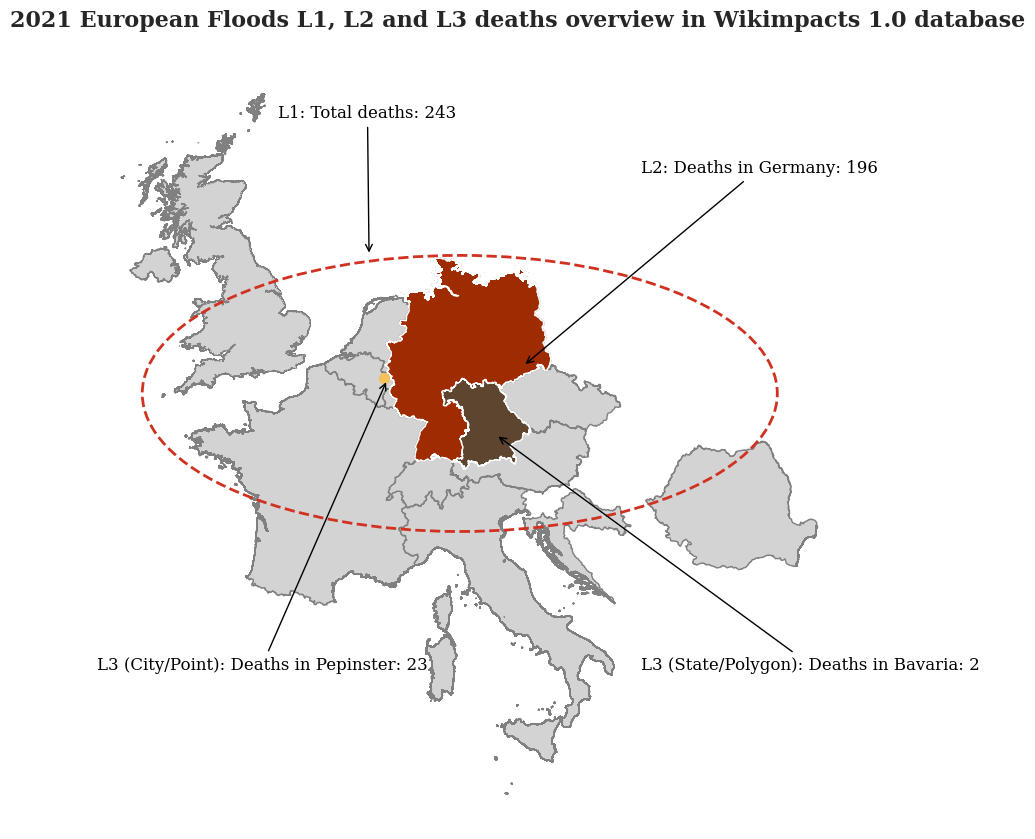

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.patches import Ellipse

# Load the country boundaries for Europe
europe = gpd.read_file("/home/nl/Wikimpacts/Visualizations/GADM/Country/country_GADM.shp")

# Filter for countries in Europe with emphasis on Belgium, France, and Germany
countries_of_interest = [
    'Austria', 'Belgium', 'Czechia', 'Croatia', 'France', 'Germany', 'Italy',
    'Luxembourg', 'Netherlands', 'Romania', 'Switzerland', 'United Kingdom'
]
europe = europe[europe['COUNTRY'].isin(countries_of_interest)]

# Ensure valid geometries
europe = europe[europe.is_valid]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')  # Set aspect ratio to equal to avoid the aspect error
europe.plot(ax=ax, color='lightgrey', edgecolor='gray')

# Highlight Bavaria and Sachsen in Germany
germany = europe[europe['COUNTRY'] == 'Germany']
germany.plot(ax=ax, color='#9F2B00')

# Load a GeoDataFrame for German states (assuming you have a shapefile for them)
states = gpd.read_file('/home/nl/Wikimpacts/Visualizations/GADM/euflood/gadm41_DEU_shp/gadm41_DEU_1.shp')
be = gpd.read_file("/home/nl/Wikimpacts/Visualizations/GADM/euflood/gadm41_BEL_shp/gadm41_BEL_4.shp")

# Ensure valid geometries for states
states = states[states.is_valid]

# Highlight Bavaria in blue
bavaria = states[states['VARNAME_1'] == 'Bavaria']
bavaria.plot(ax=ax, color='#5D4530')

# Highlight Pepinster in green as a dot
Pepinster = be[be['NAME_4'] == 'Pepinster']
ax.scatter(Pepinster.geometry.centroid.x, Pepinster.geometry.centroid.y, color='#F4C15A', s=50, label='Pepinster')

# Define the ellipse parameters
center_x = 10
center_y = 50
width = 35  # xfact (equivalent to scaling in the x direction)
height = 10  # yfact (equivalent to scaling in the y direction)

# Create the ellipse using Matplotlib
ellipse = Ellipse((center_x, center_y), width=width, height=height,
                  edgecolor='#D13120', facecolor='none', linestyle='--', linewidth=2)

# Add the ellipse to the plot
ax.add_patch(ellipse)

# Adding labels with adjusted positions for better clarity
ax.annotate("L1: Total deaths: 243", xy=(5, 55), xytext=(0, 60),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'), fontsize=12, color='black')
ax.annotate("L3 (City/Point): Deaths in Pepinster: 23", xy=(6, 50.5), xytext=(-10, 40),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'), fontsize=12, color='black')
ax.annotate("L3 (State/Polygon): Deaths in Bavaria: 2", xy=(12, 48.5), xytext=(20, 40),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'), fontsize=12, color='black')
ax.annotate("L2: Deaths in Germany: 196", xy=(13.5, 51), xytext=(20, 58),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->'), fontsize=12, color='black')

# Set axis off for a cleaner look
ax.set_axis_off()
# Add a title in the upper left corner
ax.text(-0.1, 1.05, '2021 European Floods L1, L2 and L3 deaths overview in Wikimpacts 1.0 database', transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='center')
output_path="/home/nl/Wikimpacts/Visualizations/L1-L3-euflood.pdf"
plt.savefig(output_path, format="pdf", dpi=1200, bbox_inches='tight', pad_inches=0.3)
# Show the plot
plt.show()


# L1 pie and bar chart

In [1]:
# Filter out rows where 'Main_Event' is 'Terrorist Attack' or 'Geomagnetic Storm'
filtered_df = filter_df[~filter_df['Main_Event'].isin(['Terrorist Attack', 'Geomagnetic Storm'])]
# Merge L2 with L1 based on 'Event_ID', keeping all rows from L2
L2_main_event = L2.merge(filtered_df[['Event_ID', 'Main_Event']], on='Event_ID', how='left')

L3_main_event = L3.merge(filtered_df[['Event_ID', 'Main_Event']], on='Event_ID', how='left')





NameError: name 'filter_df' is not defined

In [10]:
event_counts = L3_main_event["Main_Event"].value_counts()
event_counts

Main_Event
Tropical Storm/Cyclone         23736
Flood                           3486
Tornado                         3247
Extratropical Storm/Cyclone     2401
Wildfire                        1714
Extreme Temperature              518
Drought                           36
Name: count, dtype: int64

In [11]:
from pyecharts import options as opts

from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.charts import Pie

# Assuming you have a DataFrame L3_main_event and a dictionary custom_colors defined

# Calculate the event counts

event_labels = event_counts.index.tolist()
selected_event_types = [
    "Flood",
    "Drought",
    "Wildfire",
    "Tornado",
    "Extratropical Storm/Cyclone",
    "Tropical Storm/Cyclone",
    "Extreme Temperature"
]
selected_event_types_x_lable = [
    "Flood",
    "Drought",
    "Wildfire",
    "Tornado",
    "Extrat. Cycl",
    "Trop. Cycl",
    "Extr. Temp."
]
event_label_mapping = dict(zip(selected_event_types, selected_event_types_x_lable))

# Update the event_labels with the new x labels
updated_event_labels = [
    event_label_mapping[label] if label in event_label_mapping else label for label in event_labels]

data = zip(updated_event_labels, event_counts.values)
x=[
    "Flood",
    "Drought",
    "Wildfire",
    "Tornado",
    "Extrat. Cycl",
    "Trop. Cycl",
    "Extr. Temp."
]

#y=[      358,     12,  222, 286, 248,1739 ,63]
#y= [ 1785,   31,    835, 1251, 1178, 14422,270]
y=[3486,      36,  1714, 3247, 2401,23736, 518]
custom_font_style = opts.TextStyleOpts(
    font_family="Arial",  # Replace with your desired font
)
custom_colors_for_ab = {
    "Flood": "#76b947",  #  A navy blue.
    "Drought": "#FFD29D",  #  A light peach or pastel orange.
    "Wildfire": "#ff8882",  # A light pink.
    "Tornado": "#918450",  # A muted khaki or olive color.
    "Extrat. Cycl": "#00619c",  # A vivid turquoise or teal.
    "Trop. Cycl": "#00AFB9",  # A medium blue-gray or steel blue.-green
    "Extr. Temp.": "#A41623",  # A deep, dark red or crimson.
}
# Generate a list of colors corresponding to the event types
colors = [custom_colors_for_ab[event] for event in x]
pie = (

Pie()

.add(' ',[(i,j)for i,j in zip(x,y)])

.set_global_opts(
        title_opts=opts.TitleOpts(
            title="(c)  Main event impact data entries (L3)",
            title_textstyle_opts=opts.TextStyleOpts(
                font_family="custom_font",  # Use the custom font name
                font_size=26,
                font_weight="bold",
            ),
            pos_left="left",
            pos_top="0.1%",
        ),  legend_opts=opts.LegendOpts(
            is_show=False  # Hide legend
        ),
    )
.set_colors(colors)
.set_series_opts(
    label_opts=opts.LabelOpts(
        formatter="{b}: {c} entries\n({d}%)",  # {b} for label, {c} for value, {d} for percentage
        font_size=20,
        font_family="custom_font",  # Apply the custom font to labels
        font_weight="bold"
    )
)

)


pie.render_notebook()
output_path = "events_by_type(pie)_l3.html"
pie.render(output_path)
# Inject custom font CSS into the rendered HTML file
custom_font_css = f"""
<style>
@font-face {{
    font-family: "custom_font";
    src: url("{font_path}");
}}
</style>
"""

# Open the generated HTML file and inject the CSS
with open(output_path, "r", encoding="utf-8") as file:
    html_content = file.read()

# Add the custom CSS at the beginning of the <head> section
html_content = html_content.replace(
    "<head>",
    f"<head>{custom_font_css}"
)

# Save the modified HTML file
with open(output_path, "w", encoding="utf-8") as file:
    file.write(html_content)

print(f"Chart rendered with custom font and saved to {output_path}.")


Chart rendered with custom font and saved to events_by_type(pie)_l3.html.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the DataFrame df and custom_colors defined

# Convert 'Start_Date_Year' to numeric
filtered_df["Start_Date_Year"] = pd.to_numeric(filtered_df["Start_Date_Year"], errors="coerce")
# Drop rows where 'Start_Date_Year' is NaN
filtered_df = filtered_df.dropna(subset=["Start_Date_Year"])

# Group the years into decades (e.g., 2020 for 2020s, 2010 for 2010s)
filtered_df["Decade_Class"] = (filtered_df["Start_Date_Year"] // 10) * 10

# Group by 'Decade_Class' and 'Main_Event' and count occurrences
event_decade_counts = filtered_df.groupby(["Decade_Class", "Main_Event"]).size().reset_index(name="Count")

# Pivot the table to have one column per event type
event_decade_counts_pivot = event_decade_counts.pivot(
    index="Decade_Class", columns="Main_Event", values="Count"
).fillna(0)

# Ensure that all values in event_decade_counts_pivot are numeric
event_decade_counts_pivot = event_decade_counts_pivot.apply(pd.to_numeric, errors="coerce")

# Calculate the total number of events in each decade
totals_per_decade = event_decade_counts_pivot.sum(axis=1)

# Sort the columns so the most frequent event type appears first
event_totals = event_decade_counts_pivot.sum().sort_values(ascending=False)
event_decade_counts_pivot = event_decade_counts_pivot[event_totals.index]  # Reorder columns based on total counts

# Plot grouped bar chart using Seaborn settings for aesthetics, with Matplotlib for stacking
fig, ax = plt.subplots(figsize=(20, 10))

bars = event_decade_counts_pivot.plot(
    kind="bar",
    stacked=True,
    color=[custom_colors.get(event, "#333333") for event in event_decade_counts_pivot.columns],
    ax=ax,
    legend=False  # Hide the legend initially
)

# Hide the grid
ax.grid(False)

# Add data labels with percentages on each bar (rounded to 1 decimal)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    decade_label = int(p.get_x() + p.get_width() / 2)
    if height > 0:
        total = totals_per_decade.iloc[decade_label]

# Rotate x-axis labels for better readability and set custom decade labels
decade_labels = [
    f"{int(decade)}s" for decade in event_decade_counts_pivot.index
]


ax.set_xticklabels(decade_labels, rotation=45, fontsize=16)

# Set y-axis ticks to increase by 2
max_y = int(totals_per_decade.max()) + 2
# Set the number of ticks on the y-axis
plt.yticks(range(0, max_y, 100),fontsize=24,)

# Add labels and title
plt.xlabel("Decade", fontsize=24)
plt.ylabel("Number of events", fontsize=24)
plt.title("(a)  Decadal distribution of main events (L1)", fontsize=24,fontweight='bold',)

# Add the legend in the upper left corner
event_legend_labels = event_decade_counts_pivot.columns
selected_event_types = [
    "Flood",  
    "Drought",  
    "Wildfire",  
    "Tornado",  
    "Extratropical Storm/Cyclone",  
    "Tropical Storm/Cyclone",  
    "Extreme Temperature"
]
selected_event_types_x_lable = [
    "Flood",  
    "Drought",  
    "Wildfire",  
    "Tornado",  
    "Extrat. Cycl",  
    "Trop. Cycl",  
    "Extr. Temp."
]
event_label_mapping = dict(zip(selected_event_types, selected_event_types_x_lable))

# Update the event_labels with the new x labels
updated_event_labels = [event_label_mapping[label] if label in event_label_mapping else label for label in event_legend_labels]
ax.legend(updated_event_labels, loc="upper left", bbox_to_anchor=(0.02, 0.95), fontsize=24)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the figure
output_path = "bar_L1.png"
plt.savefig(output_path, format="png", dpi=300)

# Show the plot
plt.show()


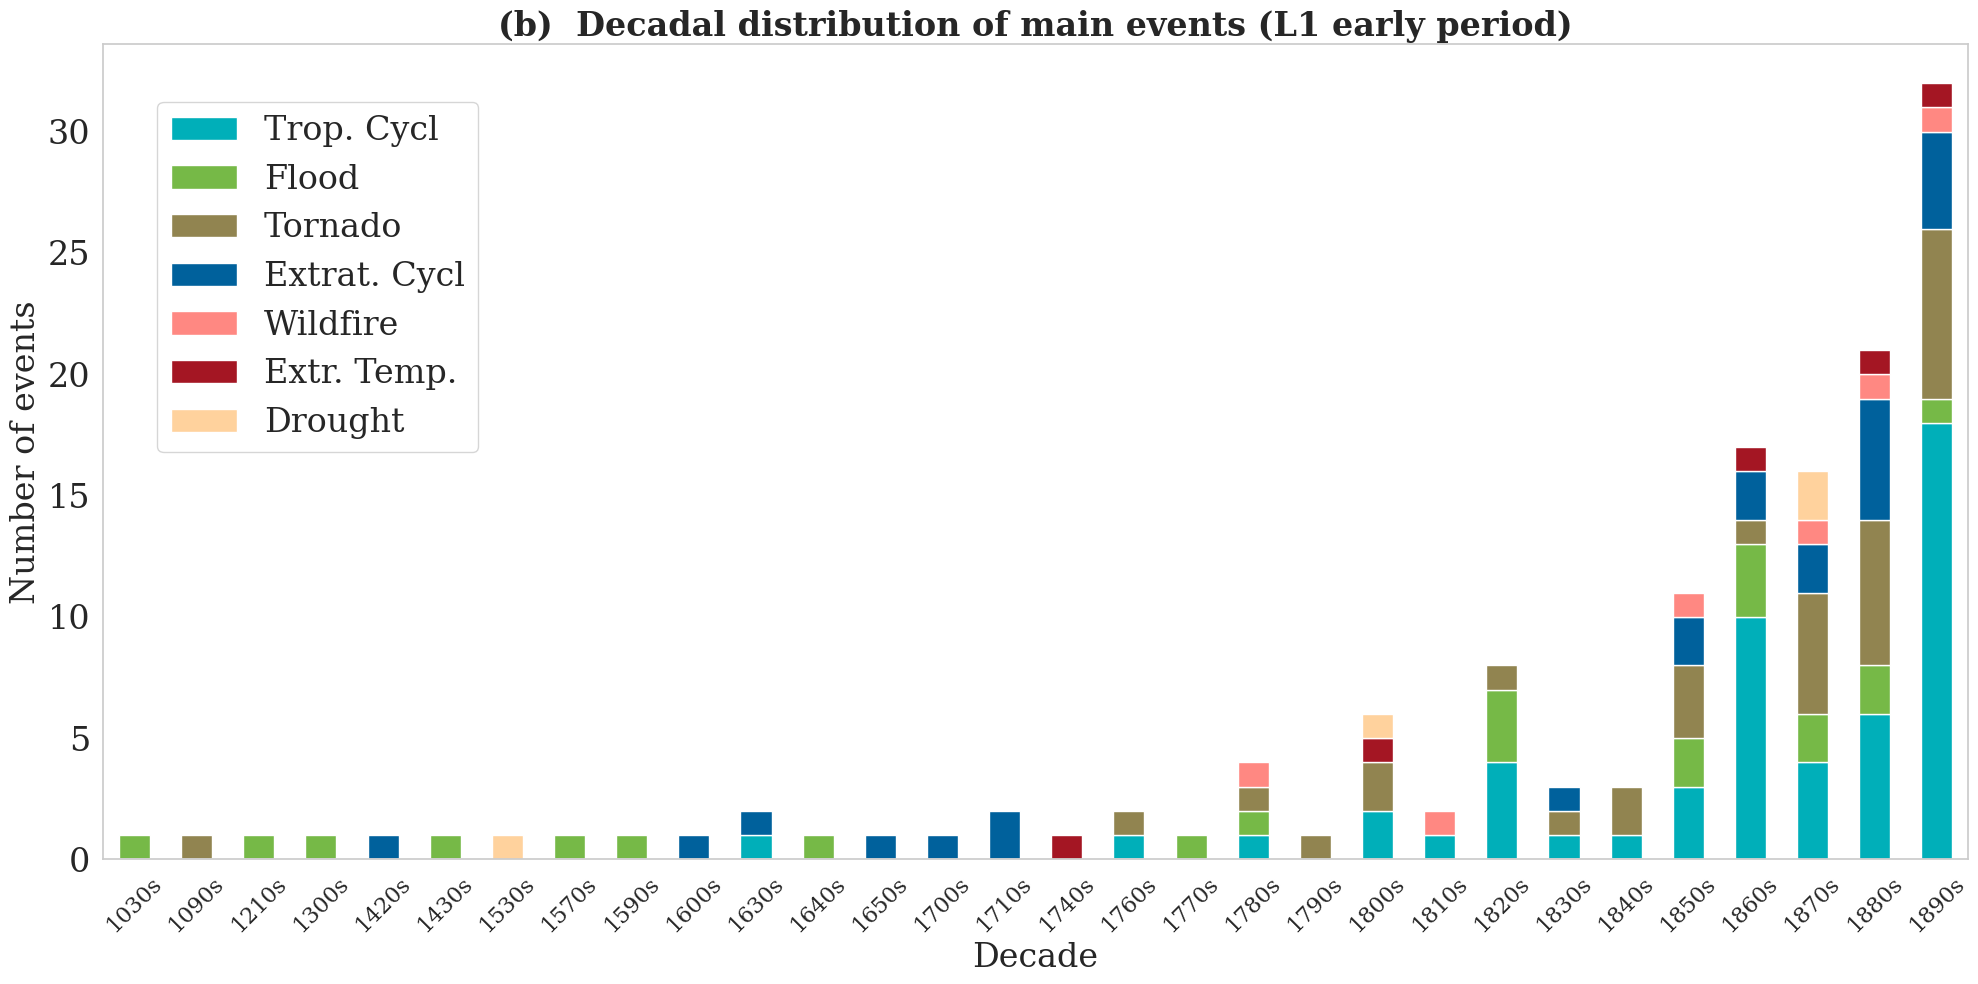

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have the DataFrame df and custom_colors defined

# Convert 'Start_Date_Year' to numeric
filtered_df["Start_Date_Year"] = pd.to_numeric(filtered_df["Start_Date_Year"], errors="coerce")
# Drop rows where 'Start_Date_Year' is NaN
filtered_df = filtered_df.dropna(subset=["Start_Date_Year"])

# Group the years into decades (e.g., 2020 for 2020s, 2010 for 2010s)
filtered_df["Decade_Class"] = (filtered_df["Start_Date_Year"] // 10) * 10

# Group by 'Decade_Class' and 'Main_Event' and count occurrences
event_decade_counts = filtered_df.groupby(["Decade_Class", "Main_Event"]).size().reset_index(name="Count")

# Pivot the table to have one column per event type
event_decade_counts_pivot = event_decade_counts.pivot(
    index="Decade_Class", columns="Main_Event", values="Count"
).fillna(0)

# Ensure that all values in event_decade_counts_pivot are numeric
event_decade_counts_pivot = event_decade_counts_pivot.apply(pd.to_numeric, errors="coerce")

# Calculate the total number of events in each decade
totals_per_decade = event_decade_counts_pivot.sum(axis=1)

# Sort the columns so the most frequent event type appears first
event_totals = event_decade_counts_pivot.sum().sort_values(ascending=False)
event_decade_counts_pivot = event_decade_counts_pivot[event_totals.index]  # Reorder columns based on total counts

# Split the data into early and recent decades
split_year = 1900
early_data = event_decade_counts_pivot[event_decade_counts_pivot.index < split_year]
recent_data = event_decade_counts_pivot[event_decade_counts_pivot.index >= split_year]

def plot_decadal_distribution(data, title, filename):
    # Plot grouped bar chart using Seaborn settings for aesthetics, with Matplotlib for stacking
    fig, ax = plt.subplots(figsize=(20, 10))

    data.plot(
        kind="bar",
        stacked=True,
        color=[custom_colors.get(event, "#333333") for event in data.columns],
        ax=ax,
        legend=False  # Hide the legend initially
    )

    # Hide the grid
    ax.grid(False)

    # Rotate x-axis labels for better readability and set custom decade labels
    decade_labels = [f"{int(decade)}s" for decade in data.index]
    ax.set_xticklabels(decade_labels, rotation=45, fontsize=16)

    # Set y-axis ticks
    max_y = int(data.sum(axis=1).max()) 
    plt.yticks(range(0, max_y, 5),fontsize =24)

    # Add labels and title
    plt.xlabel("Decade", fontsize=24)
    plt.ylabel("Number of events", fontsize=24)
    plt.title(title, fontsize=24, fontweight='bold')

    # Add the legend in the upper left corner
    event_legend_labels = data.columns
    selected_event_types = [
    "Flood",  
    "Drought",  
    "Wildfire",  
    "Tornado",  
    "Extratropical Storm/Cyclone",  
    "Tropical Storm/Cyclone",  
    "Extreme Temperature"
]
    selected_event_types_x_lable = [
        "Flood",  
        "Drought",  
        "Wildfire",  
        "Tornado",  
        "Extrat. Cycl",  
        "Trop. Cycl",  
        "Extr. Temp."
    ]
    event_label_mapping = dict(zip(selected_event_types, selected_event_types_x_lable))
    #ax.legend(event_legend_labels, loc="upper left", bbox_to_anchor=(0.02, 0.95), fontsize=16)
    # Update the event_labels with the new x labels
    updated_event_labels = [event_label_mapping[label] if label in event_label_mapping else label for label in event_legend_labels]
    ax.legend(updated_event_labels, loc="upper left", bbox_to_anchor=(0.02, 0.95), fontsize=24)
    # Adjust the layout to make room for the legend
    plt.tight_layout()

    # Save the figure
    plt.savefig(filename, format="png", dpi=300)

    # Show the plot
    plt.show()

# Plot the early decades
early_title = "(b)  Decadal distribution of main events (L1 early period)"
early_filename = "Decadal_Distribution_Early_Period.png"
plot_decadal_distribution(early_data, early_title, early_filename)




# update this events impacts figures, name etc in .py file 

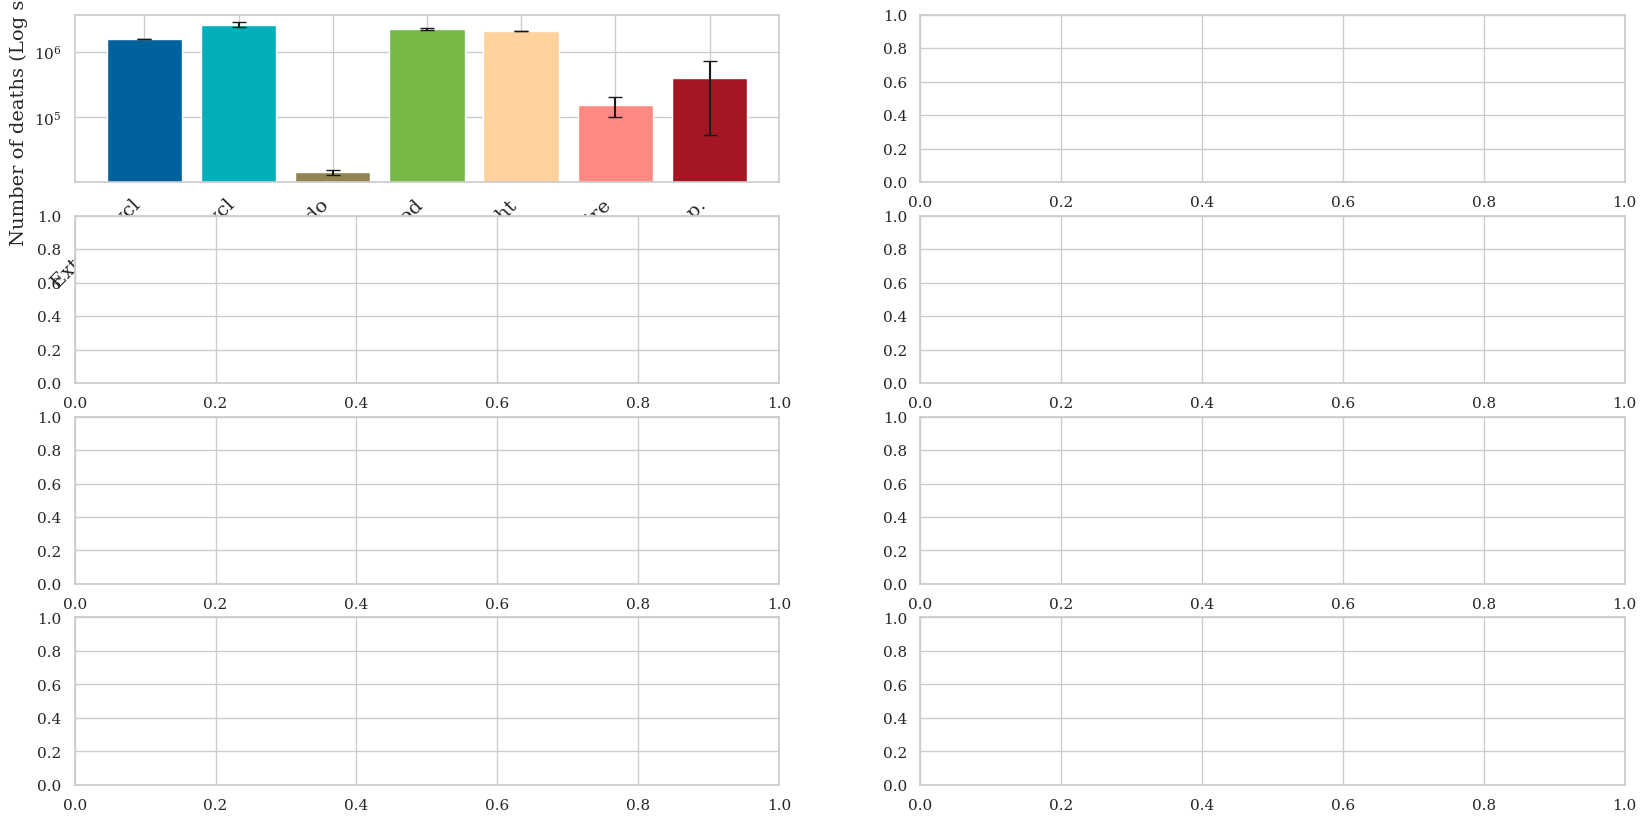

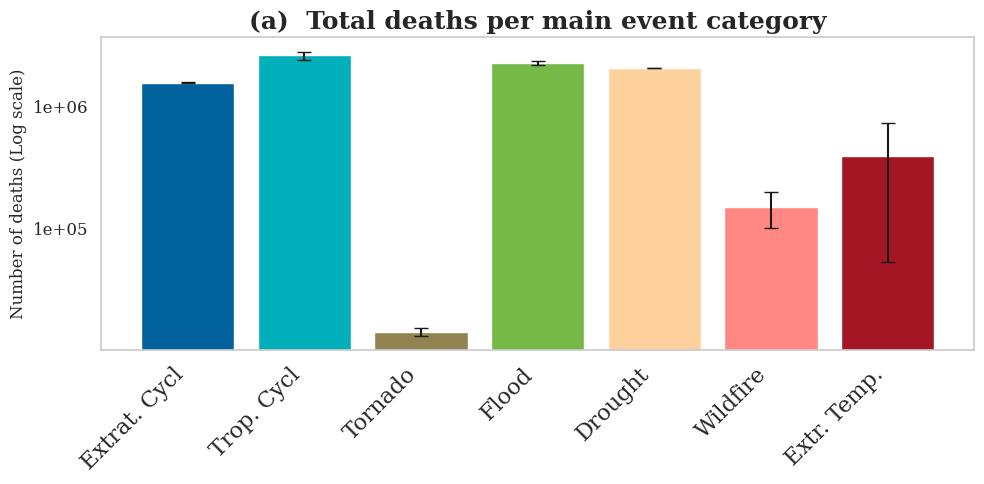

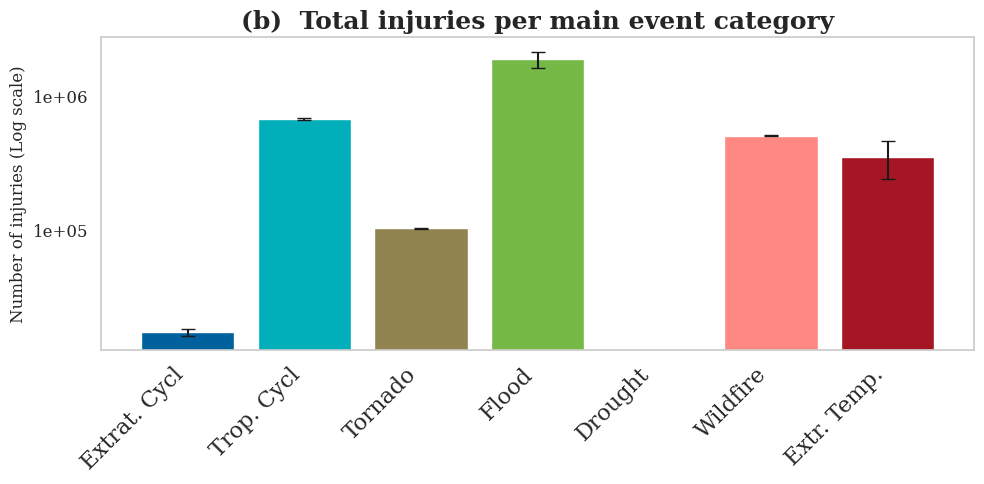

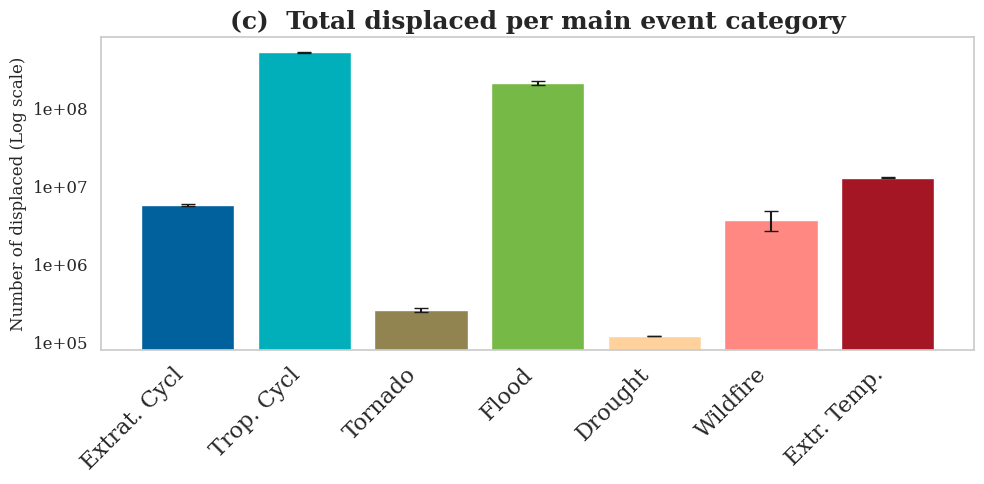

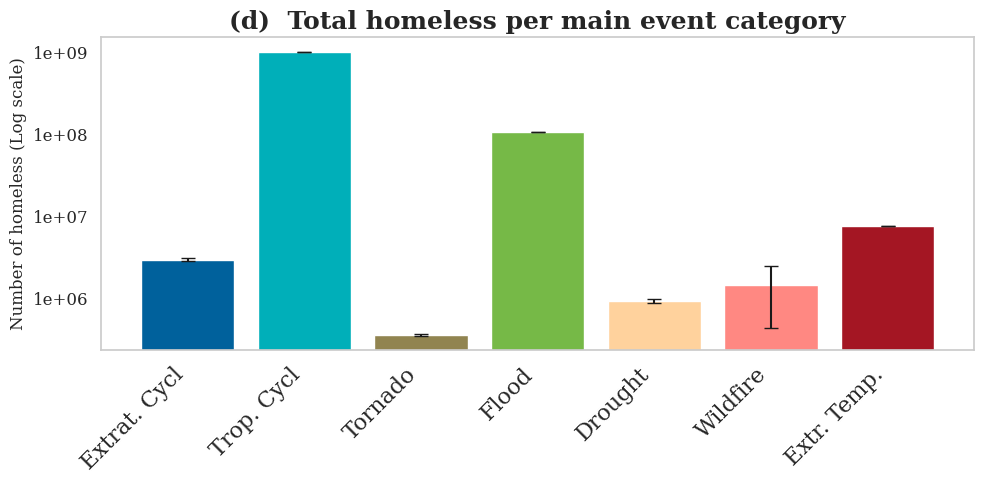

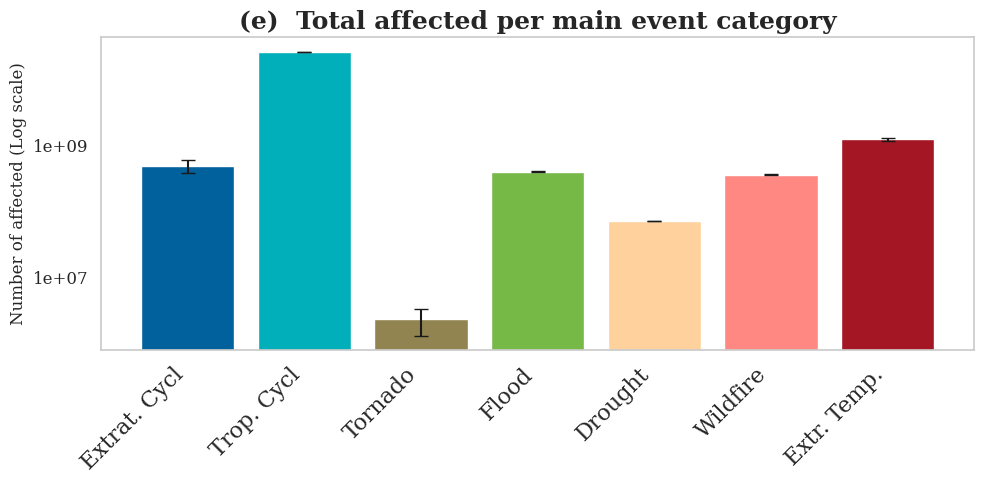

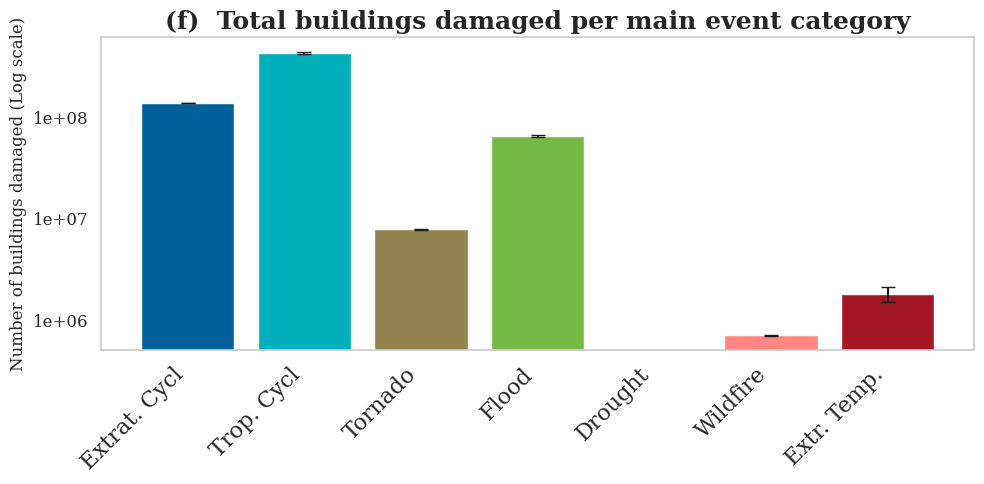

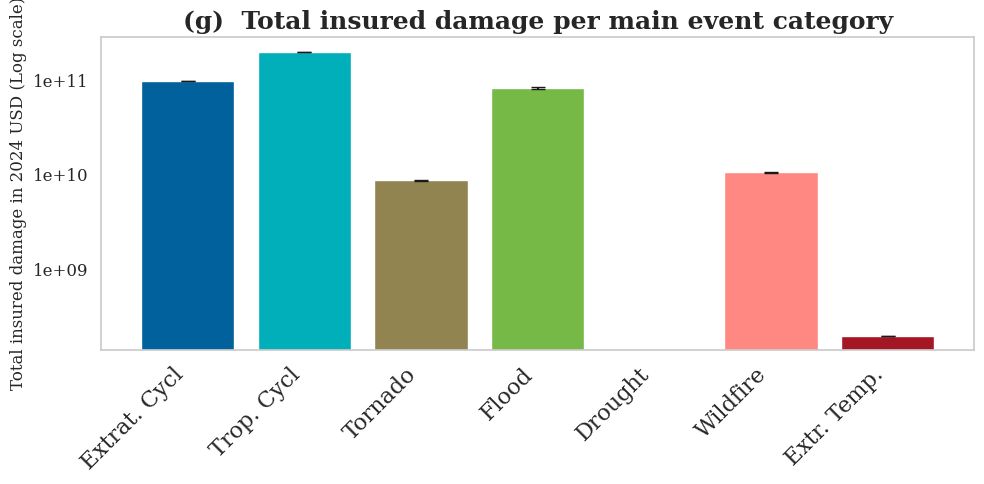

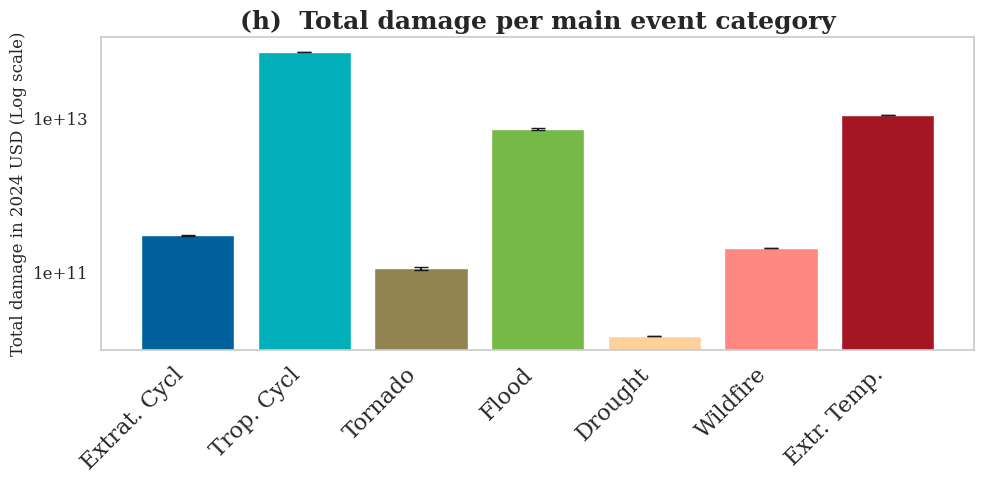

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.ticker import LogLocator, LogFormatter

# Define the event types and impact categories
selected_event_types = [
     "Extratropical Storm/Cyclone",  
    "Tropical Storm/Cyclone",  
        "Tornado", 
    "Flood",  
    "Drought",  
    "Wildfire",  
   
    "Extreme Temperature"
]
selected_event_types_x_lable = [
     "Extrat. Cycl",  
    "Trop. Cycl", 
       "Tornado",  
    "Flood",  
    "Drought",  
    "Wildfire",  
 
    
    "Extr. Temp."
]

# Define impact categories without '_Min' or '_Max' suffixes
numerical_impacts = [
    'Total_Deaths', 'Total_Injuries', 
    'Total_Displaced', 'Total_Homeless', 'Total_Affected', 'Total_Buildings_Damaged'
]
monetary_impacts = ['Total_Insured_Damage','Total_Damage', ]

# Define custom labels for x-ticks
xtick_labels = {
    'Total_Deaths': 'deaths',
    'Total_Injuries': 'injuries',
    
    'Total_Displaced': 'displaced',
    'Total_Homeless': 'homeless',
    'Total_Affected': 'affected',
    'Total_Buildings_Damaged': 'buildings damaged',
    
    'Total_Insured_Damage': 'insured damage',
    'Total_Damage': 'damage',
}

# Convert relevant columns to numeric, coercing errors to NaN, then fill NaN with 0
columns_to_convert = []
for impact in numerical_impacts + monetary_impacts:
    columns_to_convert.extend([impact + '_Min', impact + '_Max'])

for column in columns_to_convert:
    filtered_df[column] = pd.to_numeric(filtered_df[column], errors='coerce').fillna(0)

# Combine impact categories for plotting
all_impact_categories = numerical_impacts + monetary_impacts

# Set up the figure with 8 subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
axes = axes.flatten()

# Loop through each impact category to create individual subplots
for idx, impact in enumerate(all_impact_categories):
   

    impact_min_col = impact + '_Min'
    impact_max_col = impact + '_Max'
    # Prepare data for each event within the current impact category
    impact_data = []
    for event in selected_event_types:
        event_df = filtered_df[filtered_df['Main_Event'] == event]
        total_min_value = event_df[impact_min_col].sum()
        total_max_value = event_df[impact_max_col].sum()
        mean_value = (total_min_value + total_max_value) / 2
        impact_data.append({
            'Event': event,
            'Mean Value': mean_value,
            'Min Value': total_min_value,
            'Max Value': total_max_value,
            'yerr_minus': mean_value - total_min_value,
            'yerr_plus': total_max_value - mean_value
        })
    
    # Create a DataFrame for the current impact category
    impact_df = pd.DataFrame(impact_data)
    
    # Plotting on the corresponding axis
    ax = axes[idx]
    
    # Get the positions for the x-axis
    x_pos = range(len(impact_df))
    
    # Extract the mean values and errors
    means = impact_df['Mean Value']
    yerr = [impact_df['yerr_minus'], impact_df['yerr_plus']]
    
    # Plot bars with error bars
    ax.bar(
        x=x_pos,
        height=means,
        yerr=yerr,
        align='center',
        color=[custom_colors[event] for event in impact_df['Event']],
        capsize=5
    )
    
    # Set log scale for the y-axis
    ax.set_yscale('log')
    
    # Set x-ticks and labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels(selected_event_types_x_lable, rotation=45, ha='right',fontsize=14)
    
    # Set y-labels
    if impact in monetary_impacts:
        ylabel = f'Total {xtick_labels[impact]} in 2024 USD (Log scale)'
    else:
        ylabel = f'Number of {xtick_labels[impact]} (Log scale)'
    ax.set_ylabel(ylabel, fontsize=14)
    
    # Ensure y-axis is linear
    # ax.set_yscale('log')  # Remove this line if present
    
    # Save each subplot individually
    # Create a separate figure
    fig_single, ax_single = plt.subplots(figsize=(10, 5))
    ax_single.bar(
        x_pos,
        means,
        yerr=yerr,
        align='center',
        color=[custom_colors[event] for event in impact_df['Event']],
        capsize=5,
    )
    
    ax_single.set_yscale('log')
      
    # Increase the y-axis tick font size
    ax_single.tick_params(axis='y', labelsize=12)  # Adjust the font size here
    # Set the number of major ticks on the y-axis to 4 using LogLocator
    ax_single.yaxis.set_major_locator(LogLocator(base=10.0, numticks=5))
    
    # Optionally, format the tick labels
    ax_single.yaxis.set_major_formatter(LogFormatter(base=10.0))
    ax_single.set_xticks(x_pos)
    ax_single.set_xticklabels(selected_event_types_x_lable, rotation=45, ha='right',fontsize=16)
     # Generate a list of alphabetic markers
    markers = [f"({chr(97 + i)})" for i in range(len(xtick_labels))]  # (a), (b), (c), ...
    ax_single.grid(False)
    ax_single.set_ylabel(ylabel, fontsize=12)
    ax_single.set_title(f'{markers[idx]}  Total {xtick_labels[impact]} per main event category', fontsize=18,fontweight="bold")
    plt.tight_layout()
    plt.savefig(f"Impact_Per_Event_{impact}_2.png", format='png', dpi=330)
    plt.show()


# update the map with GID

In [12]:
# L1 map overview 
import geopandas as gpd 


path_2="/home/nl/Wikimpacts/Visualizations/GADM/Country/country_GADM.shp"
world=gpd.read_file(path_2)


# L1

In [8]:
import geopandas as gpd 
world = gpd.read_file(f"/home/nl/Wikimpacts/Visualizations/GADM/Country/country_GADM.shp")

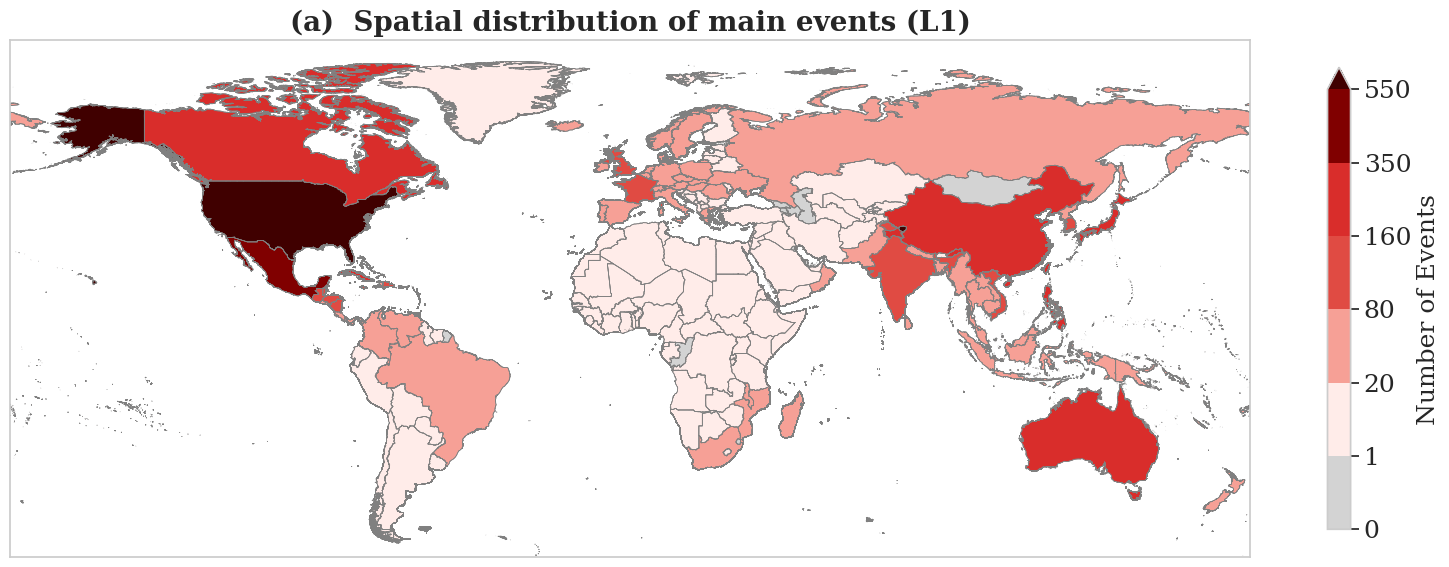

In [105]:
# map L1 over view  with GID 
import pandas as pd
import ast
import numpy as np
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.ticker import MaxNLocator
from shapely.geometry import Polygon, shape
import geopandas as gpd 
import jenkspy
import matplotlib.colors as mcolors
import json
from shapely.ops import unary_union
world = gpd.read_file(f"/home/nl/Wikimpacts/Visualizations/GADM/Country/country_GADM.shp")
def flatten_and_parse(lst):
    """
    Recursively flattens a nested list and safely evaluates strings representing lists.
    """
    result = []
    for item in lst:
        if isinstance(item, list) or isinstance(item, np.ndarray):
            result.extend(flatten_and_parse(item))
        elif isinstance(item, str):
            # Try to parse the string as a list
            try:
                item_parsed = ast.literal_eval(item)
                if isinstance(item_parsed, list):
                    result.extend(flatten_and_parse(item_parsed))
                else:
                    result.append(str(item_parsed))
            except (ValueError, SyntaxError):
                result.append(item)
        else:
            result.append(str(item))
    return result

def count_events_per_admin_area(df):
    """
    Counts the number of Main_Events per Administrative_Area.

    Args:
        df (pd.DataFrame): DataFrame containing 'Main_Event' and 'Administrative_Areas_GeoJson' columns.
    Returns:
        pd.DataFrame: DataFrame with 'Administrative_Area' and 'Count' columns.
    """
    # Step 1: Extract administrative area identifiers into a new column
    def extract_admin_areas(area_list):
        if area_list is None or (isinstance(area_list, float) and np.isnan(area_list)):
            return []
        if not isinstance(area_list, list):
            area_list = [area_list]
        # Remove NaN values
        area_list = [item for item in area_list if not pd.isnull(item)]
        if not area_list:
            return []
        # Flatten and parse the list
        area_list = flatten_and_parse(area_list)
        return area_list
    # Check the data type of the column
    #print(type(df["Administrative_Areas_GeoJson"].iloc[0]))  # Check the first row to see the type of data

    df["GID"] = df["Administrative_Areas_GID"].apply(extract_admin_areas)

    # Step 2: Explode the DataFrame so each administrative area has its own row
    df_exploded = df.explode("GID")
   
    # Step 3.1: Group by the administrative areas and count the number of Main_Event occurrences
    event_count_per_admin_area = df_exploded.groupby("GID")["Main_Event"].count().reset_index()
 
    


    # Step 4: Rename columns for clarity
    event_count_per_admin_area.columns = ["GID_0", "Count"]

    return event_count_per_admin_area

event_count_per_admin_area=count_events_per_admin_area(filtered_df)


# visualize the spatial distribution using the Adminstrative_Areas column in L1
def plot_main_events_per_admin_area(df, world, event_count, output_file):
        # Dissolve the geometries by GID_0 to create country-level geometries
        
        merged_gdf = world.merge(event_count, on='GID_0', how='left')

        # Replace NaN counts with zero
        merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

        # Ensure 'Count' is numeric and finite
        merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
        merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]

        #breaks = # Define custom breaks
        breaks = [0, 1,  20, 80, 160, 350, 550]
        # Define colors, with light grey specifically for zero
       # Updated color palette with a smoother transition for the fifth color
        cmap_colors = [
    '#D3D3D3',  # Light grey for 0 
    '#ffece9',  # Light pinkish grey (transition from grey to pale red)

    '#f6a096',  # Light salmon 

    '#e04b43',  # Soft red 
    '#d92d2b',  # Strong red 
    '#800000',  # Vivid red 
    '#400000',  # Dark red 
]




    

        # Create colormap and norm for plotting
        cmap = mcolors.ListedColormap(cmap_colors)
       
        norm = mcolors.BoundaryNorm(breaks, cmap.N, extend='max')

        # Plotting
        fig, ax = plt.subplots(figsize=(20, 15))

       

        # Plot using GeoPandas
        merged_gdf.plot(
            column='Count',
            cmap=cmap,
            norm=norm,
            linewidth=0.5,
            ax=ax,
            edgecolor='gray',
        
        )
        merged_gdf.boundary.plot(ax=ax, color='gray', linewidth=0.5)
        ax.grid(False) 
        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm._A = []
       
        cbar =  plt.colorbar(sm, ax=ax, label=f"Number of Event", shrink=0.4)
        cbar.ax.tick_params(labelsize=18)  # Set font size for colorbar ticks
        cbar.set_label("Number of Events", fontsize=18)  # Set font size for the label
        ax.set_xlim(-180, 180)
        ax.set_ylim(-60, 90)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.title(f"(a)  Spatial distribution of main events (L1)", fontsize=20,fontweight="bold")
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.show()
outputpath="L1_GID.png"
plot_main_events_per_admin_area(filtered_df, world,event_count_per_admin_area, outputpath)


In [12]:
 # L1 differnt main events maps 
selected_event_types = [
        "Extratropical Storm/Cyclone",  
    "Tropical Storm/Cyclone", 
    "Flood",  
    "Tornado",  
    "Drought",  
    "Wildfire",  
    "Extreme Temperature"
    ]
import geopandas as gpd 
import jenkspy
import matplotlib.colors as mcolors
import json
import pandas as pd
import ast
import numpy as np
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.ticker import MaxNLocator
from shapely.geometry import Polygon, shape

def flatten_and_parse(lst):
    """
    Recursively flattens a nested list and safely evaluates strings representing lists.
    """
    result = []
    for item in lst:
        if isinstance(item, list) or isinstance(item, np.ndarray):
            result.extend(flatten_and_parse(item))
        elif isinstance(item, str):
            # Try to parse the string as a list
            try:
                item_parsed = ast.literal_eval(item)
                if isinstance(item_parsed, list):
                    result.extend(flatten_and_parse(item_parsed))
                else:
                    result.append(str(item_parsed))
            except (ValueError, SyntaxError):
                result.append(item)
        else:
            result.append(str(item))
    return result

def count_events_per_admin_area(df, event):
    """
    Counts the number of Main_Events per Administrative_Area.

    Args:
        df (pd.DataFrame): DataFrame containing 'Main_Event' and 'Administrative_Areas_GeoJson' columns.
        event (str): The event type to filter on.

    Returns:
        pd.DataFrame: DataFrame with 'Administrative_Area' and 'Count' columns.
    """
    # Step 1: Extract administrative area identifiers into a new column
    def extract_admin_areas(area_list):
        if area_list is None or (isinstance(area_list, float) and np.isnan(area_list)):
            return []
        if not isinstance(area_list, list):
            area_list = [area_list]
        # Remove NaN values
        area_list = [item for item in area_list if not pd.isnull(item)]
        if not area_list:
            return []
        # Flatten and parse the list
        area_list = flatten_and_parse(area_list)
        return area_list

    df["GID"] = df["Administrative_Areas_GID"].apply(extract_admin_areas)

    # Step 2: Explode the DataFrame so each administrative area has its own row
    df_exploded = df.explode("GID")

    # Step 3: Filter for the specific event and drop rows with NaN in "Administrative_Areas" or "Main_Event"
    df_exploded_filter = df_exploded[
        (df_exploded["Main_Event"] == event) 
       
    ]

    # Step 4: Group by the administrative areas and count the number of Main_Event occurrences
    event_count_per_admin_area = (
        df_exploded_filter.groupby("GID")["Main_Event"]
        .count()
        .reset_index()
        .rename(columns={"GID": "GID_0", "Main_Event": "Count"})
    )

    # Step 5: Filter out non-finite values in the "Count" column
    event_count_per_admin_area = event_count_per_admin_area[np.isfinite(event_count_per_admin_area["Count"])]

    return event_count_per_admin_area


# Define a function to round to the nearest increment
def round_to_nearest(value, increment):
    return round(value / increment) * increment




def get_explicit_color_gradient(base_color, n_shades, start_factor=0.2, end_factor=1):
    """
    Generate a color gradient from light to dark for the base color.
    Allows adjusting the gradient intensity by setting start and end factors.
    """
    colors = ['#D3D3D3']  # Light grey for zero or no data
    base_rgb = mcolors.to_rgb(base_color)
    
    # Generate gradient shades with an increased color intensity range
    gradient_colors = [
        mcolors.to_hex((base_rgb[0] * (start_factor + (end_factor - start_factor) * i / n_shades),
                        base_rgb[1] * (start_factor + (end_factor - start_factor) * i / n_shades),
                        base_rgb[2] * (start_factor + (end_factor - start_factor) * i / n_shades)))
        for i in range(1, n_shades + 1)
    ]
    
    colors.extend(gradient_colors[::-1])
    return colors



def plot_main_events_per_admin_area_all( world, event_count, output_file, event,order):
    # Prepare a dictionary to map Administrative_Areas names to their geometries
 

    merged_gdf = world.merge(event_count, on='GID_0', how='left')

    # Replace NaN counts with zero
    merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

    # Ensure 'Count' is numeric and finite
    merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
    merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]

    # Replace NaN counts with zero
    merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

    # Ensure 'Count' is numeric and finite
    merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
    merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]
    if merged_gdf.empty or merged_gdf['Count'].isnull().all() or (merged_gdf['Count'].sum() == 0):
        print(f"No data to plot for event: {event}. Skipping plot.")
        return

    
    # Calculate Jenks breaks only if data is sufficient
    unique_values_count = len(set(merged_gdf["Count"].values))
    print(unique_values_count)
    n_classes = min(6, unique_values_count)

    if n_classes < 2:
        print(f"Insufficient data for Jenks breaks for event: {event}. Skipping plot.")
        return

    try:
        # Calculate Jenks breaks starting from 1, then prepend with 0-1 range
        finite_breaks = jenkspy.jenks_breaks(
            [v for v in merged_gdf["Count"].values if v > 1], n_classes=n_classes - 1
        )
        # Apply the rounding to each break in finite_breaks, excluding the first two values [0, 1]
        finite_breaks = [0, 1] + [round_to_nearest(break_value, 5) for break_value in finite_breaks[2:]]

    except Exception as e:
        print(f"Error calculating Jenks breaks for event: {event}. Error: {e}")
        return  # Exit if Jenks breaks calculation fails

    # Ensure finite_breaks has valid breaks and contains more than just zero and one
    if not finite_breaks or len(finite_breaks) < 3:
        print(f"No valid breaks generated for event: {event}. Skipping plot.")
        return

    # Adjust number of colors based on valid breaks
    n_colors = len(finite_breaks) - 1
    cmap_colors = get_explicit_color_gradient(custom_colors.get(event, "#0000FF"), n_colors)
    cmap = mcolors.ListedColormap(cmap_colors)
    norm = mcolors.BoundaryNorm(finite_breaks, ncolors=cmap.N)

    # Plotting
    fig, ax = plt.subplots(figsize=(20, 15))

    world.plot(ax=ax, color='lightgray', edgecolor='gray', linewidth=0.5)


    # Plot using GeoPandas
    merged_gdf.plot(
        column='Count',
        cmap=cmap,
        norm=norm,
        linewidth=0.1,
        ax=ax,
        edgecolor='gray',
    
    )

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    #plt.colorbar(sm, ax=ax, label=f"Number of {event}", shrink=0.5)
    cbar = plt.colorbar(sm, ax=ax,  shrink=0.4)
    cbar.ax.tick_params(labelsize=18)  # Adjust font size of the colorbar labels
    cbar.set_label( f"Number of {event}",fontsize=18)
    ax.set_xlim(-180, 180)
    ax.set_ylim(-60, 90)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    plt.title(f"({order})  Spatial distribution of {event}",fontsize=20, fontweight="bold")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()


# drought L1

In [14]:
 # L1 differnt main events maps 
selected_event_types = [
    "Flood",  
    "Drought",  
    "Wildfire",  
    "Tornado",  
    "Extratropical Storm/Cyclone",  
    "Tropical Storm/Cyclone",  
    "Extreme Temperature"
    ]
# Define your custom colors
custom_colors = {
    "Flood": "#76b947",  # A navy blue.
    "Drought": "#FFD29D",  # A light peach or pastel orange.
    "Wildfire": "#ff8882",  # A light pink.
    "Tornado": "#918450",  # A muted khaki or olive color.
    "Extratropical Storm/Cyclone": "#00AFB9",  # A vivid turquoise or teal.
    "Tropical Storm/Cyclone": "#00619c",  # A medium blue-gray or steel blue-green
    "Extreme Temperature": "#A41623",  # A deep, dark red or crimson.
}
import pandas as pd
import ast
import numpy as np
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.ticker import MaxNLocator
from shapely.geometry import Polygon, shape

def flatten_and_parse(lst):
    """
    Recursively flattens a nested list and safely evaluates strings representing lists.
    """
    result = []
    for item in lst:
        if isinstance(item, list) or isinstance(item, np.ndarray):
            result.extend(flatten_and_parse(item))
        elif isinstance(item, str):
            # Try to parse the string as a list
            try:
                item_parsed = ast.literal_eval(item)
                if isinstance(item_parsed, list):
                    result.extend(flatten_and_parse(item_parsed))
                else:
                    result.append(str(item_parsed))
            except (ValueError, SyntaxError):
                result.append(item)
        else:
            result.append(str(item))
    return result

def count_events_per_admin_area_per_main_event(df, event):
    """
    Counts the number of Main_Events per Administrative_Area.

    Args:
        df (pd.DataFrame): DataFrame containing 'Main_Event' and 'Administrative_Areas_GeoJson' columns.
        event (str): The event type to filter on.

    Returns:
        pd.DataFrame: DataFrame with 'Administrative_Area' and 'Count' columns.
    """
    # Step 1: Extract administrative area identifiers into a new column
    def extract_admin_areas(area_list):
        if area_list is None or (isinstance(area_list, float) and np.isnan(area_list)):
            return []
        if not isinstance(area_list, list):
            area_list = [area_list]
        # Remove NaN values
        area_list = [item for item in area_list if not pd.isnull(item)]
        if not area_list:
            return []
        # Flatten and parse the list
        area_list = flatten_and_parse(area_list)
        return area_list

    df["GID"] = df["Administrative_Areas_GID"].apply(extract_admin_areas)

    # Step 2: Explode the DataFrame so each administrative area has its own row
    df_exploded = df.explode("GID")

    # Step 3: Filter for the specific event and drop rows with NaN in "Administrative_Areas" or "Main_Event"
    df_exploded_filter = df_exploded[
        (df_exploded["Main_Event"] == event) 
       
    ]

    # Step 4: Group by the administrative areas and count the number of Main_Event occurrences
    event_count_per_admin_area = (
        df_exploded_filter.groupby("GID")["Main_Event"]
        .count()
        .reset_index()
        .rename(columns={"GID": "GID_0", "Main_Event": "Count"})
    )

    # Step 5: Filter out non-finite values in the "Count" column
    event_count_per_admin_area = event_count_per_admin_area[np.isfinite(event_count_per_admin_area["Count"])]

    return event_count_per_admin_area


# Define a function to round to the nearest increment
def round_to_nearest(value, increment):
    return round(value / increment) * increment




def get_explicit_color_gradient(base_color, n_shades, start_factor=0.2, end_factor=1):
    """
    Generate a color gradient from light to dark for the base color.
    Allows adjusting the gradient intensity by setting start and end factors.
    """
    colors = ['#D3D3D3']  # Light grey for zero or no data
    base_rgb = mcolors.to_rgb(base_color)
    
    # Generate gradient shades with an increased color intensity range
    gradient_colors = [
        mcolors.to_hex((base_rgb[0] * (start_factor + (end_factor - start_factor) * i / n_shades),
                        base_rgb[1] * (start_factor + (end_factor - start_factor) * i / n_shades),
                        base_rgb[2] * (start_factor + (end_factor - start_factor) * i / n_shades)))
        for i in range(1, n_shades + 1)
    ]
    
    colors.extend(gradient_colors[::-1])
    return colors



def plot_drought_per_admin_area( world, event_count, output_file,event):
    # Prepare a dictionary to map Administrative_Areas names to their geometries
 

    merged_gdf = world.merge(event_count, on='GID_0', how='left')

    # Replace NaN counts with zero
    merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

    # Ensure 'Count' is numeric and finite
    merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
    merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]

    # Replace NaN counts with zero
    merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

    # Ensure 'Count' is numeric and finite
    merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
    merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]
    
    finite_breaks=[0,1,2,3,5]
    # Adjust number of colors based on valid breaks
    n_colors = len(finite_breaks) - 1
    cmap_colors = get_explicit_color_gradient(custom_colors.get(event, "#0000FF"), n_colors)
    cmap = mcolors.ListedColormap(cmap_colors)
    norm = mcolors.BoundaryNorm(finite_breaks, ncolors=cmap.N)

    # Plotting
    fig, ax = plt.subplots(figsize=(20, 15))

    #world.plot(ax=ax, color='lightgray', edgecolor='gray', linewidth=0.5)


    # Plot using GeoPandas
    merged_gdf.plot(
        column='Count',
        cmap=cmap,
        norm=norm,
        linewidth=0.1,
        ax=ax,
        edgecolor='gray',
    
    )

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar= plt.colorbar(sm, ax=ax,  shrink=0.4)
    cbar.ax.tick_params(labelsize=18)  # Adjust font size of the colorbar labels
    cbar.set_label( f"Number of Drought",fontsize=18)
    ax.set_xlim(-180, 180)
    ax.set_ylim(-60, 90)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    plt.title(f"(h)  Spatial distribution of Drought", fontsize=20,fontweight="bold")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()


73


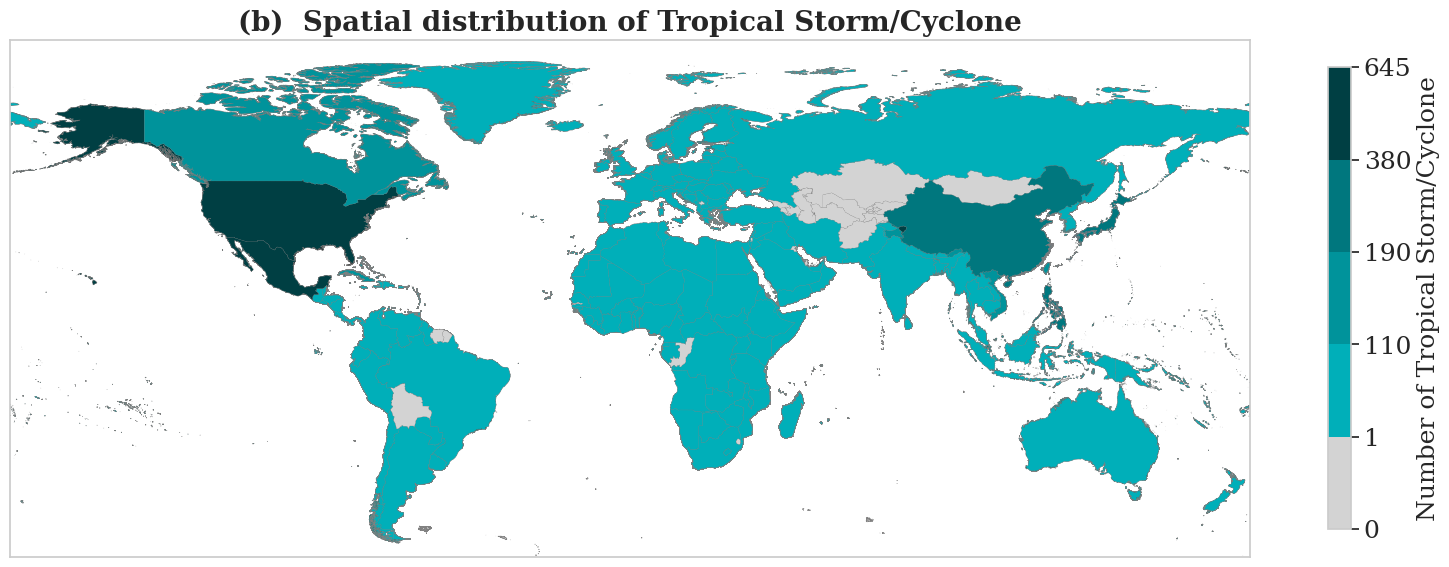

22


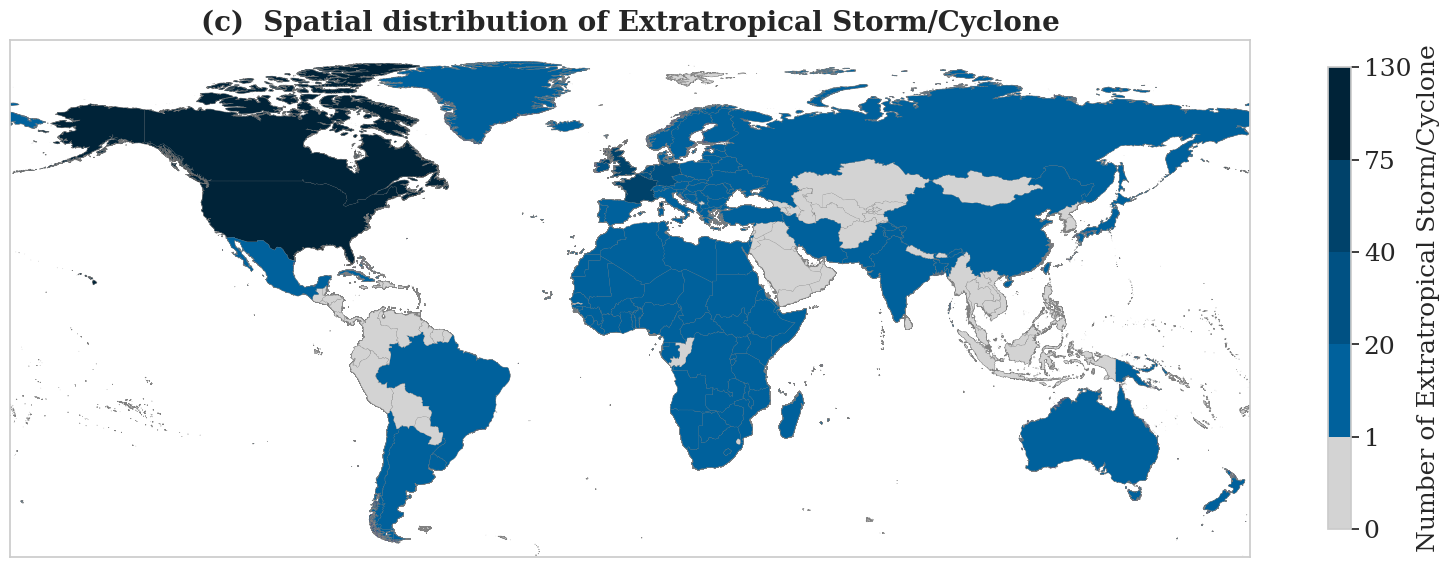

20


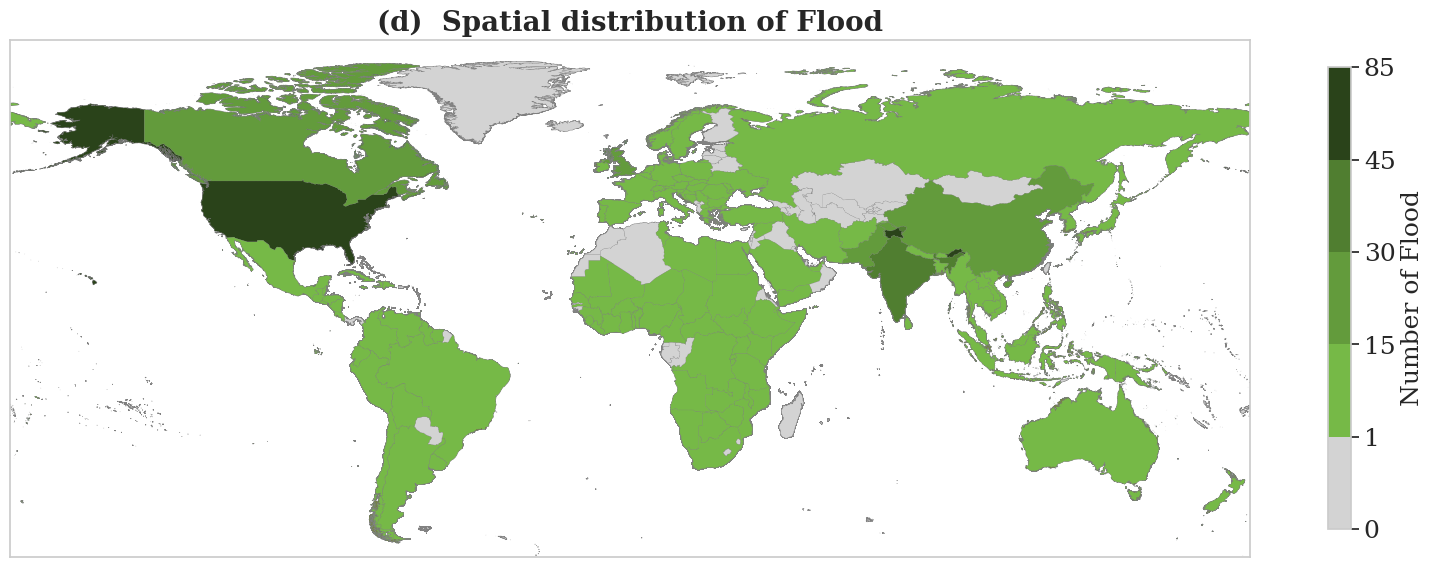

11


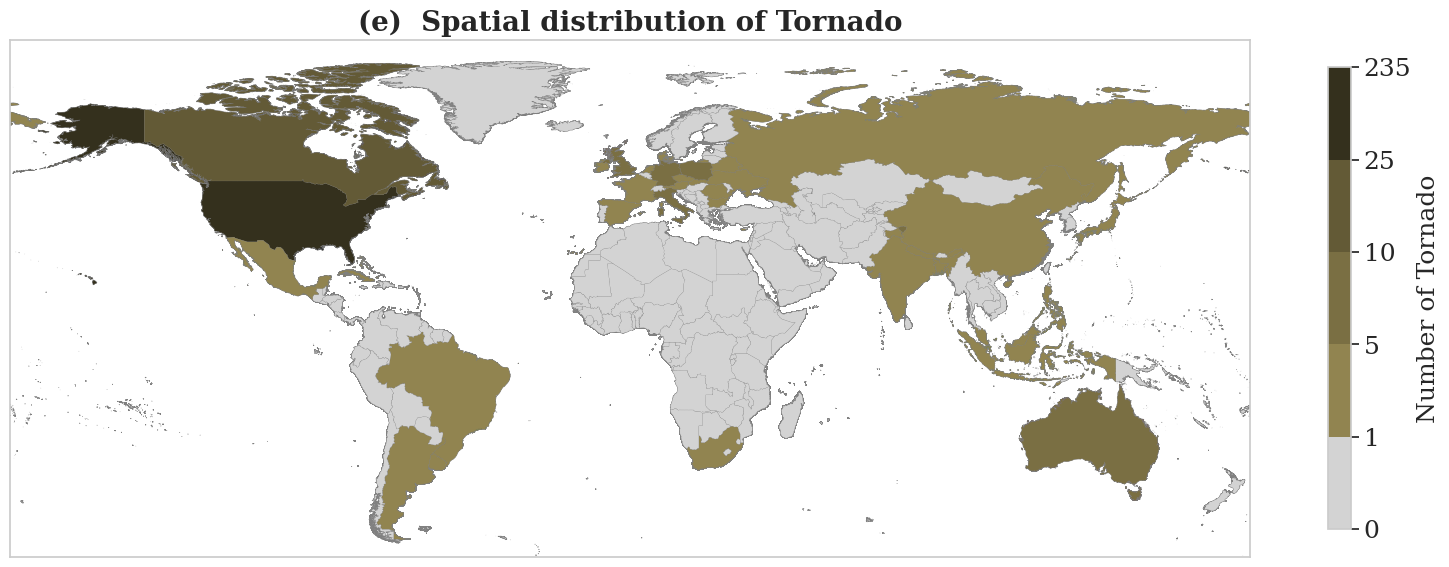

13


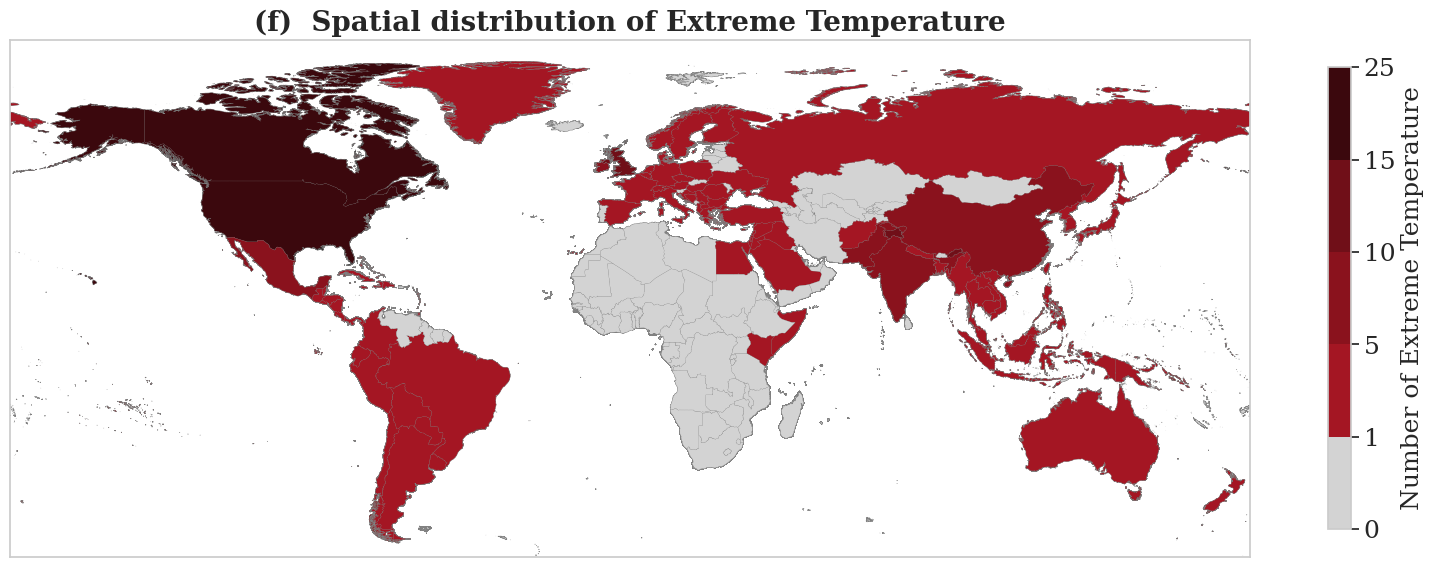

11


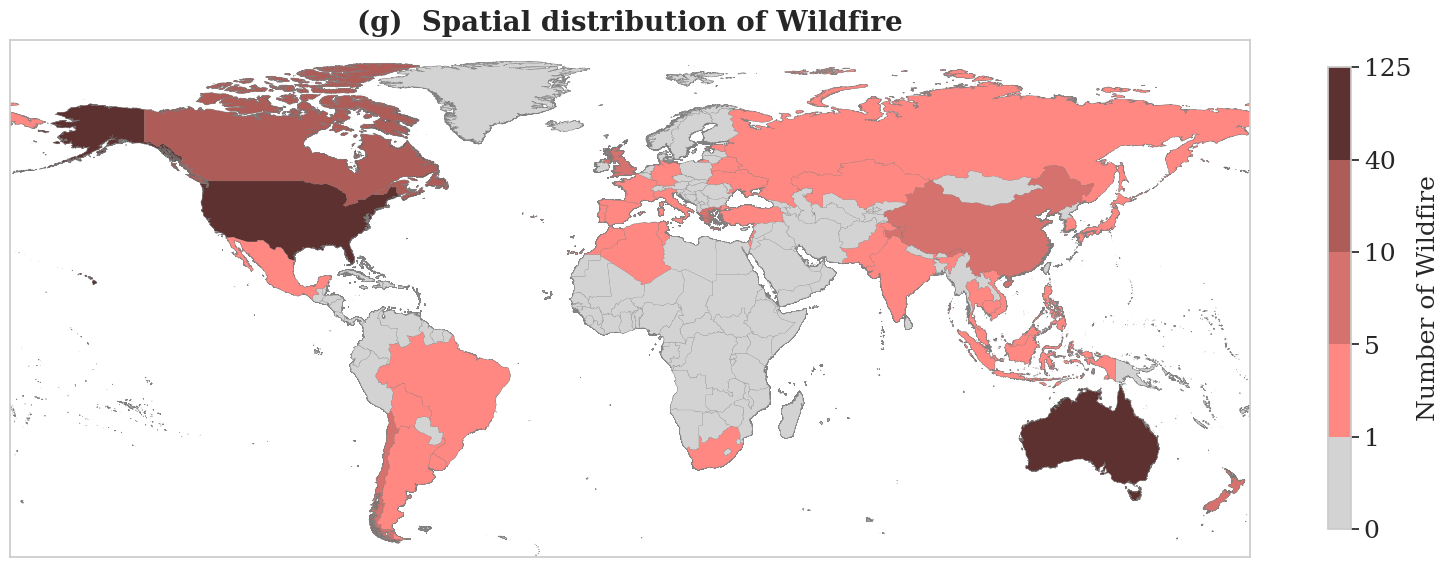

In [111]:
selected_event_types = [
    "Tropical Storm/Cyclone", 
    "Extratropical Storm/Cyclone",  
    "Flood",  
    "Tornado",  
    "Extreme Temperature",
    "Wildfire",  
]

# Define the order of labels to use in titles
order = ["b", "c", "d", "e", "f", "g"]

# Iterate over selected_event_types and the corresponding labels in `order`
for event, letter in zip(selected_event_types, order):
    # Count events for the current event type
    event_count_per_admin_area = count_events_per_admin_area_per_main_event(filtered_df, event)
    
    # Define the output path for the plot
    outputpath = f"{event.replace('/', '_')}_L1.png"

    # Pass the letter to include it in the title
    plot_main_events_per_admin_area_all(world, event_count_per_admin_area, outputpath, event, letter)



In [5]:
drought_count_per_admin_area = count_events_per_admin_area_per_main_event(filter_df, "Drought")

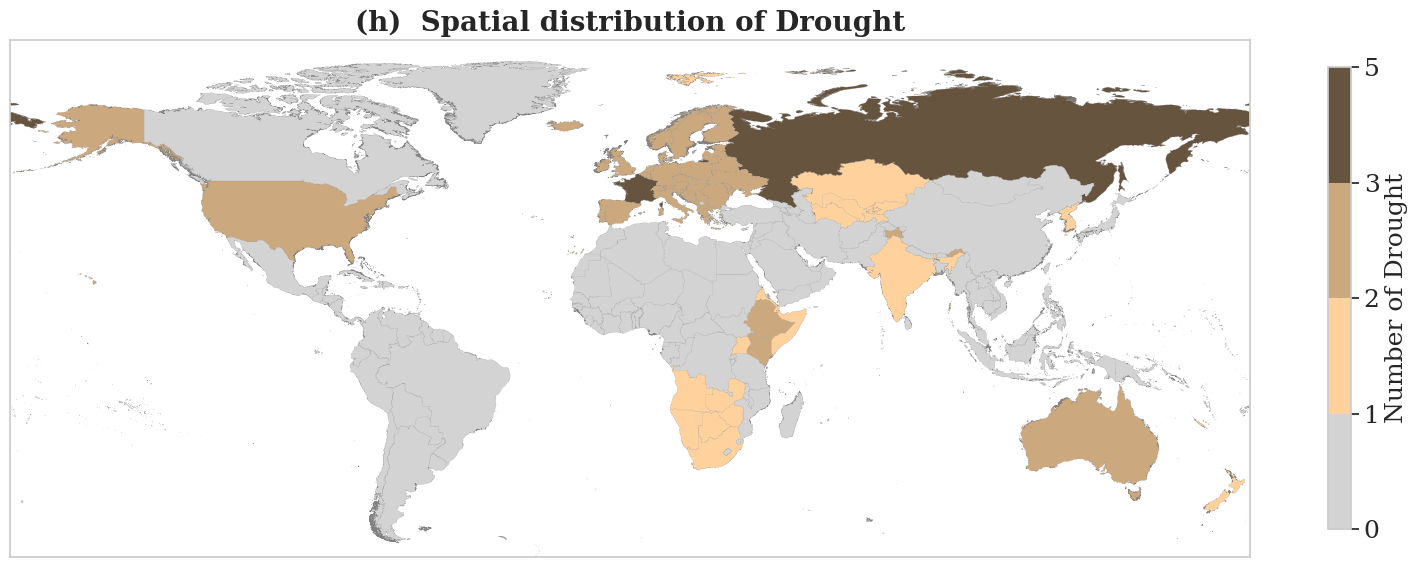

In [15]:
outputpath = f"Drought_L1.png"
plot_drought_per_admin_area(world, drought_count_per_admin_area, outputpath,"Drought")

# L2

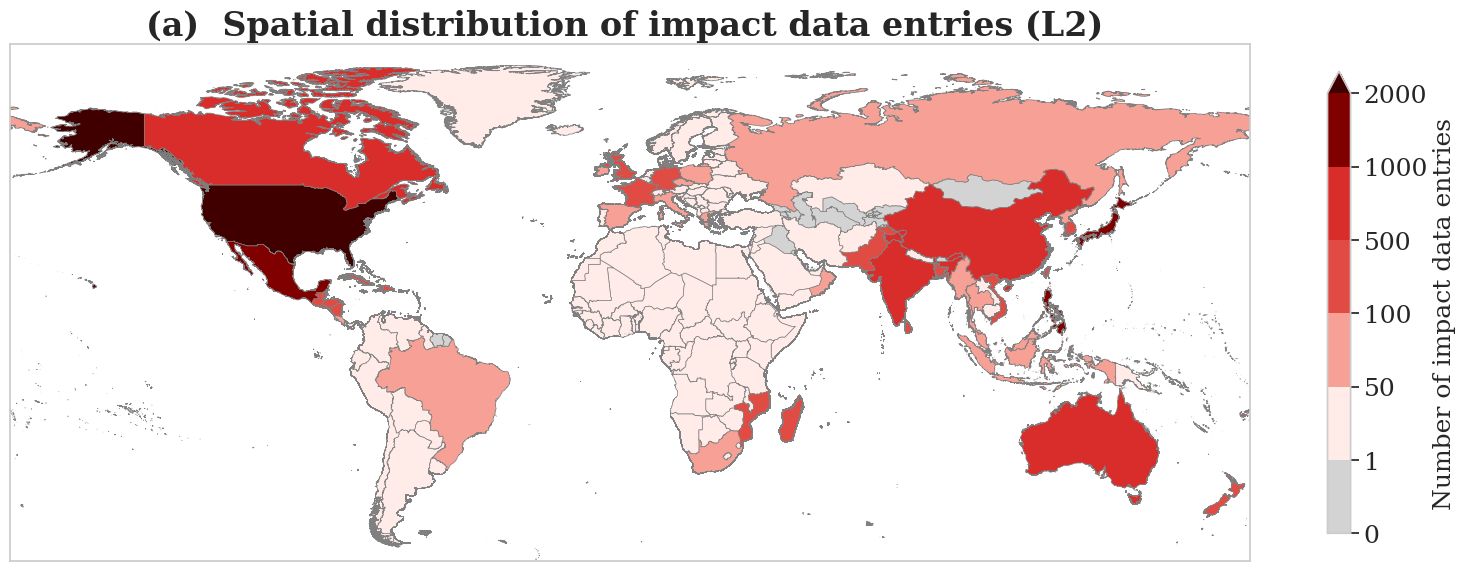

In [24]:
# L2 visualization 
# map L2
import pandas as pd
import ast
import numpy as np
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.ticker import MaxNLocator
from shapely.geometry import Polygon, shape
def flatten_and_parse(lst):
    """
    Recursively flattens a nested list and safely evaluates strings representing lists.
    """
    result = []
    for item in lst:
        if isinstance(item, list) or isinstance(item, np.ndarray):
            result.extend(flatten_and_parse(item))
        elif isinstance(item, str):
            # Try to parse the string as a list
            try:
                item_parsed = ast.literal_eval(item)
                if isinstance(item_parsed, list):
                    result.extend(flatten_and_parse(item_parsed))
                else:
                    result.append(str(item_parsed))
            except (ValueError, SyntaxError):
                result.append(item)
        else:
            result.append(str(item))
    return result

def count_events_per_admin_area_L2(df):
    """
    Counts the number of Main_Events per Administrative_Area.

    Args:
        df (pd.DataFrame): DataFrame containing 'Main_Event' and 'Administrative_Areas_GeoJson' columns.
    Returns:
        pd.DataFrame: DataFrame with 'Administrative_Area' and 'Count' columns.
    """
    # Step 1: Extract administrative area identifiers into a new column
    def extract_admin_areas(area_list):
        if area_list is None or (isinstance(area_list, float) and np.isnan(area_list)):
            return []
        if not isinstance(area_list, list):
            area_list = [area_list]
        # Remove NaN values
        area_list = [item for item in area_list if not pd.isnull(item)]
        if not area_list:
            return []
        # Flatten and parse the list
        area_list = flatten_and_parse(area_list)
        return area_list
    # Check the data type of the column
    #print(type(df["Administrative_Areas_GeoJson"].iloc[0]))  # Check the first row to see the type of data

    df["GID"] = df["Administrative_Areas_GID"].apply(extract_admin_areas)
   
    

    # Step 2: Explode the DataFrame so each administrative area has its own row
    df_exploded = df.explode("GID")
    
    # Step 3.2: Group by the administrative areas and count the number of unique Administrative_Areas
    event_count_per_admin_area = df_exploded.groupby("GID").size().reset_index(name='Count')
    # Step 4: Rename columns for clarity
    event_count_per_admin_area.columns = ["GID_0", "Count"]

  
    return event_count_per_admin_area

#event_count_per_admin_area=count_events_per_admin_area(L2)

import geopandas as gpd 
import jenkspy
import matplotlib.colors as mcolors
import json

#world = gpd.read_file(f"/home/nl/Wikimpacts/Visualizations/earth_data/earth_data/earth_data/country_level/ne_110m_admin_0_countries.shp")
# visualize the spatial distribution using the Adminstrative_Areas column in L1
def plot_main_events_per_admin_area_L2(world, event_count, output_file):
        """
        Plots the number of Main_Events per Administrative_Area based on the provided GeoJSON file.

        Args:
        df (pd.DataFrame): DataFrame containing the Main_Event and Administrative_Areas columns.
        geojson_file (str): Path to the GeoJSON file for the Administrative_Areas.
        output_file (str): Path where the plot will be saved.

        Returns:
        None: Saves the plot to the specified output file.
        """
 

       

        merged_gdf = world.merge(event_count, on='GID_0', how='left')

        # Replace NaN counts with zero
        merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

        # Ensure 'Count' is numeric and finite
        merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
        merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]

        # Replace NaN counts with zero
        merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

        # Ensure 'Count' is numeric and finite
        merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
        merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]

        
                # Define custom breaks
        breaks = [0, 1, 50,100,500, 1000, 2000]

        # Define colors, with light grey specifically for zero
       # Updated color palette with a smoother transition for the fifth color
        cmap_colors = [
    '#D3D3D3',  # Light grey for 0 
    '#ffece9',  # Light pinkish grey (transition from grey to pale red)

    '#f6a096',  # Light salmon 

    '#e04b43',  # Soft red 
    '#d92d2b',  # Strong red 
    '#800000',  # Vivid red 
    '#400000',  # Dark red 
]


     

        # Create colormap and norm for plotting
        cmap = mcolors.ListedColormap(cmap_colors)
        norm = mcolors.BoundaryNorm(breaks, cmap.N,extend='max')

        # Plotting
        fig, ax = plt.subplots(figsize=(20, 15))

    


        # Plot using GeoPandas
        merged_gdf.plot(
            column='Count',
            cmap=cmap,
            norm=norm,
            linewidth=0.5,
            ax=ax,
            edgecolor='gray',
        
        )
        ax.grid(False)
        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm._A = []
        cbar=plt.colorbar(sm, ax=ax,  shrink=0.4)
        cbar.ax.tick_params(labelsize=18)  # Set font size for tick labels
        cbar.set_label(label=f"Number of impact data entries",fontsize=18)

        ax.set_xlim(-180, 180)
        ax.set_ylim(-60, 90)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.title(f"(a)  Spatial distribution of impact data entries (L2) ",fontsize=24,fontweight="bold")
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.show()

outputpath="L2_GID.png"
event_count_per_admin_area_L2=count_events_per_admin_area_L2(L2)
plot_main_events_per_admin_area_L2(world,event_count_per_admin_area_L2, outputpath)








# L3

In [14]:
# map L3 
 # map L1 over view  
import pandas as pd
import ast
import numpy as np
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.ticker import MaxNLocator
from shapely.geometry import Polygon, shape
import geopandas as gpd 
import jenkspy
import matplotlib.colors as mcolors
import json
# map L3 
import pandas as pd
import ast
import numpy as np
from matplotlib.patches import Polygon as MplPolygon
from matplotlib.ticker import MaxNLocator
from shapely.geometry import Polygon, shape,Point
import matplotlib.colors as mcolors
def flatten_and_parse(lst):
    """
    Recursively flattens a nested list and safely evaluates strings representing lists.
    """
    result = []
    for item in lst:
        if isinstance(item, list) or isinstance(item, np.ndarray):
            result.extend(flatten_and_parse(item))
        elif isinstance(item, str):
            # Try to parse the string as a list
            try:
                item_parsed = ast.literal_eval(item)
                if isinstance(item_parsed, list):
                    result.extend(flatten_and_parse(item_parsed))
                else:
                    result.append(str(item_parsed))
            except (ValueError, SyntaxError):
                result.append(item)
        else:
            result.append(str(item))
    return result

def count_events_per_location(df):
    """
    Counts the number of Main_Events per Administrative_Area.

    Args:
        df (pd.DataFrame): DataFrame containing 'Main_Event' and 'Administrative_Areas_GeoJson' columns.
    Returns:
        pd.DataFrame: DataFrame with 'Administrative_Area' and 'Count' columns.
    """
    # Step 1: Extract administrative area identifiers into a new column
    def extract_admin_areas(area_list):
        if area_list is None or (isinstance(area_list, float) and np.isnan(area_list)):
            return []
        if not isinstance(area_list, list):
            area_list = [area_list]
        # Remove NaN values
        area_list = [item for item in area_list if not pd.isnull(item)]
        if not area_list:
            return []
        # Flatten and parse the list
        area_list = flatten_and_parse(area_list)
        return area_list
    # Check the data type of the column
    #print(type(df["Administrative_Areas_GeoJson"].iloc[0]))  # Check the first row to see the type of data

   
    # L3 locations
    
    
    df["Locations"] = df["Locations_GeoJson"].apply(extract_admin_areas)

    # Step 2: Explode the DataFrame so each administrative area has its own row
    
    df_exploded = df.explode("Locations")
    # Initialize an empty list to store the filtered locations
   # Get a list of unique administrative areas from the DataFrame
    admin_area = df_exploded['Administrative_Area_GeoJson'].dropna().unique().tolist()

    # Initialize an empty list to store the filtered locations
    filtered_locations_list = []

    # Iterate over each row in the exploded DataFrame
    for idx, row in df_exploded.iterrows():
        locations = row['Locations']
        
        # Handle NaNs and ensure locations is iterable
        if pd.isna(locations):
            filtered_locations_list.append(locations if pd.notna(locations) else [])
            continue
        
        # Make sure locations is a list (could be a single item after explode)
        if not isinstance(locations, list):
            locations = [locations]
        
        # Filter out locations that match any in the admin_area list
        filtered_locations = [loc for loc in locations if loc not in admin_area]
        
        # Append the filtered list to the results list
        filtered_locations_list.append(filtered_locations)

    # Assign the filtered results back to the DataFrame
    df_exploded['Filtered_Locations'] = filtered_locations_list

    # Step 3: Explode Filtered_Locations to have one location per row
    df_exploded = df_exploded.explode('Filtered_Locations')
    event_count_per_admin_area = df_exploded.groupby("Filtered_Locations").size().reset_index(name='Count')
  
    event_count_per_admin_area.columns = ["Location", "Count"]
    return event_count_per_admin_area

def L3_merge(gdf,event_count):
      merged_gdf = gdf.merge(event_count, on='Location', how='left')
      return merged_gdf

def polt_L3(gdf,event_count,output_file,state):
 # Merge with event counts
      
        merged_gdf = gdf.merge(event_count, on='Location', how='left')
       
        # Replace NaN counts with zero
        merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

        # Ensure 'Count' is numeric and finite
        merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
        merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]
# Calculate Jenks natural breaks
        breaks = [0,1,10,50,100,200,300]

        # Define colors, with light grey specifically for zero
        cmap_colors = [
    '#D3D3D3',  # Light grey for 0 
    '#ffece9',  # Light pinkish grey (transition from grey to pale red)

    '#f6a096',  # Light salmon 

    '#e04b43',  # Soft red 
    '#d92d2b',  # Strong red 
    '#800000',  # Vivid red 
    '#400000',  # Dark red 
]

      

        # Create colormap and norm for plotting
        cmap = mcolors.ListedColormap(cmap_colors)
        norm = mcolors.BoundaryNorm(breaks, cmap.N, extend='max')

    

    


        # Plotting
        fig, ax = plt.subplots(figsize=(15, 10))

        state.plot(ax=ax, color='lightgray', edgecolor='gray')


        # Plot using GeoPandas
        merged_gdf.plot(
            column='Count',
            cmap=cmap,
            norm=norm,
            linewidth=0.1,
            ax=ax,
            edgecolor='gray',
        
        )
        ax.grid(False)
        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm._A = []
        plt.colorbar(sm, ax=ax, label=f"Number of Impact Data Point", shrink=0.5)

        ax.set_xlim(-180, 180)
        ax.set_ylim(-60, 90)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.title(f"Spatial distribution of impact data points in sub-national scale (Regions) in Wikimpacts 1.0 database")
        plt.savefig(output_file, dpi=1200, bbox_inches='tight',format="png")
        plt.show() 
event_count=count_events_per_location(L3)
gdf=gpd.read_file("/home/nl/Wikimpacts/Visualizations/polygons.geojson")

state=gpd.read_file("/home/nl/Wikimpacts/Visualizations/GADM/Country/country_GADM.shp")
#polt_L3(gdf,event_count,"L3_regions.png",state)
df=L3_merge(gdf,event_count)

In [17]:
# Define all the values to exclude
excluded_values = [
    "arabian-sea---bhr-l-rb--central-", 
    "arabian-sea---bhr-l-rb", 
    "arabian-sea",
    "bay-of-bengal--northern-", 
    "bay-of-bengal--central-", 
    "bay-of-bengal--west-", 
    "bay-of-bengal",
    "nonafot-nunavut",
    "greenland",
]

# Filter the DataFrame to exclude the specified locations
df_without_sea = df[~df["Location"].isin(excluded_values)]


/home/nl/.cache/pypoetry/virtualenvs/wikimpacts-jRbwdZbh-py3.11/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


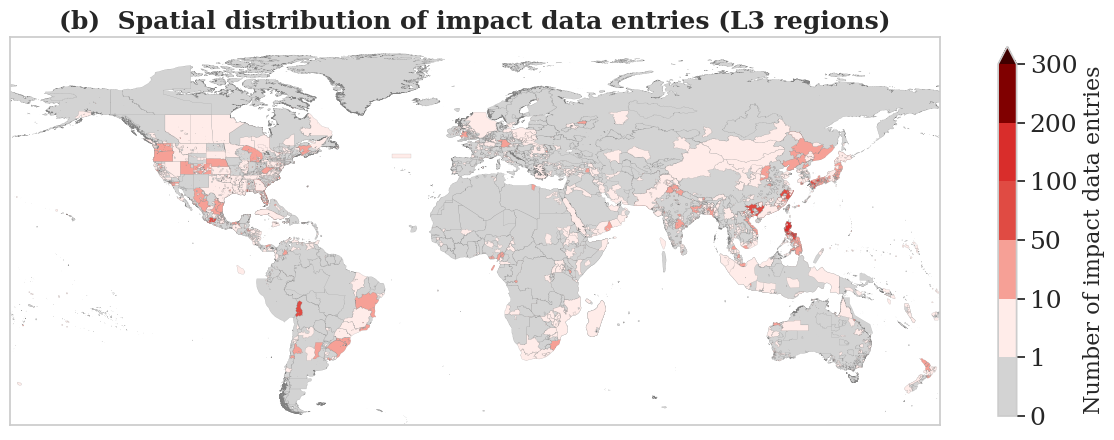

In [22]:
def polt_L3_update(merged_gdf,output_file,state):
 # Merge with event counts
      
        
       
        # Replace NaN counts with zero
        merged_gdf['Count'] = merged_gdf['Count'].fillna(0)

        # Ensure 'Count' is numeric and finite
        merged_gdf['Count'] = pd.to_numeric(merged_gdf['Count'], errors='coerce')
        merged_gdf = merged_gdf[np.isfinite(merged_gdf['Count'])]
# Calculate Jenks natural breaks
        breaks = [0,1,10,50,100,200,300]
        #breaks = [0,1,3,5,7,9,10]
        # Define colors, with light grey specifically for zero
        cmap_colors = [
    '#D3D3D3',  # Light grey for 0 
    '#ffece9',  # Light pinkish grey (transition from grey to pale red)

    '#f6a096',  # Light salmon 

    '#e04b43',  # Soft red 
    '#d92d2b',  # Strong red 
    '#800000',  # Vivid red 
    '#400000',  # Dark red 
]

      

        # Create colormap and norm for plotting
        cmap = mcolors.ListedColormap(cmap_colors)
        norm = mcolors.BoundaryNorm(breaks, cmap.N, extend='max')

    
        
    


        # Plotting
        fig, ax = plt.subplots(figsize=(15, 8))
        state.plot(ax=ax, color='lightgray', edgecolor='gray', linewidth=0.1)
        


        # Plot using GeoPandas
        merged_gdf.plot(
            column='Count',
            cmap=cmap,
            norm=norm,
            linewidth=0.1,
            ax=ax,
            edgecolor='gray',
        
        )
        ax.grid(False)
        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm._A = []
        cbar= plt.colorbar(sm, ax=ax, shrink=0.6)
        cbar.ax.tick_params(labelsize=18)  # Set font size for tick labels
        cbar.set_label(label=f"Number of impact data entries",fontsize=16)


        ax.set_xlim(-180, 180)
        ax.set_ylim(-60, 90)
        ax.set_xticks([])
        ax.set_yticks([])
        #state.plot(ax=ax, color='lightgray', edgecolor='gray', linewidth=0.1)
        plt.title(f"(b)  Spatial distribution of impact data entries (L3 regions)",fontsize=18,fontweight="bold")
        plt.savefig(output_file, dpi=300, bbox_inches='tight',format="png")
        plt.show() 
event_count=count_events_per_location(L3)
gdf=gpd.read_file("/home/nl/Wikimpacts/Visualizations/polygons.geojson")

state=gpd.read_file("/home/nl/Wikimpacts/Visualizations/GADM/Country/country_GADM.shp")
polt_L3_update(df_without_sea,"L3_region.png",state)

# compare with EM-DAT

In [2]:
import geopandas as gpd
import pandas as pd
#world = gpd.read_file(f"/home/nl/Wikimpacts/Visualizations/GADM/Country/country_GADM.shp")
ed=pd.read_excel(f"/home/nl/Wikimpacts/Visualizations/em-dat.xlsx")
# Convert year, month, day columns to datetime
# Filtering records with multiple conditions
filter_ed = ed[
    (ed["Start Year"] < 2024) | 
    ((ed["Start Year"] == 2024) & (ed["Start Month"] < 2)) | 
    ((ed["Start Year"] == 2024) & (ed["Start Month"] == 2) & (ed["Start Day"] < 29))
]




# List of columns to create individual DataFrames for
target_columns = ['Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
                  'Total Affected', "Insured Damage ('000 US$)", "Total Damage ('000 US$)"]

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import jenkspy

def filter_and_save_dataframes(df, target_columns):
    resulting_dfs = {}

    # Loop through each column and create a new DataFrame where the column value is not None/NaN
    for column in target_columns:
        filtered_df = df[df[column].notna()].copy()
        # Generate a DataFrame name from the column name
        df_name = column.lower().replace(' ', '_').replace("('000_us$)", '').replace('.', '').replace(',', '')
        resulting_dfs[df_name] = filtered_df

        # Save each DataFrame to a CSV file
        filtered_df.to_csv(f'{df_name}.csv', index=False)

    # Append all filtered DataFrames together
    appended_df = pd.concat(resulting_dfs.values(), ignore_index=True)
    
    return resulting_dfs, appended_df

# Ensure 'ed' and 'target_columns' are defined before calling the function
resulting_dfs, appended_df = filter_and_save_dataframes(filter_ed, target_columns)
#print(appended_df)



In [13]:
#appended_df
# for bar chart, flood is all, but tropical storm etc is follow the same name, and storm including all the storms excluding sand storm 
mapping1 = {
    'riverine flood': 'Flood',
    'tropical cyclone': 'Tropical Storm/Cyclone',
    'flood (general)': 'Flood',
    'storm (general)': 'Storm',
    'flash flood': 'Flood',
    'drought': 'Drought',
    'forest fire': 'Wildfire',
    'wildfire (general)': 'Wildfire',
    'cold wave': 'Extreme Weather',
    'tornado': 'Tornado',
    'severe weather': 'Storm',
    'heat wave': 'Extreme Weather',
    'blizzard/winter storm': 'Storm',
    'lightning/thunderstorms': 'Storm',
    'extra-tropical storm': 'Extratropical Storm/Cyclone',
    'hail': 'Storm',
    'land fire (brush, bush, pasture)': 'Wildfire',
    'coastal flood': 'Flood',
    'severe winter conditions': 'Extreme Weather',
    'storm surge': 'Flood',
    'sand/dust storm': 'Other',
    'glacial lake outburst flood': 'Flood'
}

mapping2 = {
    'riverine flood': 'Flood',
    'tropical cyclone': 'Storm',
    'flood (general)': 'Flood',
    'storm (general)': 'Storm',
    'flash flood': 'Flood',
    'drought': 'Drought',
    'forest fire': 'Wildfire',
    'wildfire (general)': 'Wildfire',
    'cold wave': 'Extreme Weather',
    'tornado': 'Tornado',
    'severe weather': 'Storm',
    'heat wave': 'Extreme Weather',
    'blizzard/winter storm': 'Storm',
    'lightning/thunderstorms': 'Storm',
    'extra-tropical storm': 'Storm',
    'hail': 'Storm',
    'land fire (brush, bush, pasture)': 'Wildfire',
    'coastal flood': 'Flood',
    'severe winter conditions': 'Extreme Weather',
    'storm surge': 'Flood',
    'sand/dust storm': 'Other',
    'glacial lake outburst flood': 'Flood'
}

appended_df['Disaster Subtype'] = appended_df['Disaster Subtype'].str.lower()
keywords = [word.lower() for word in [
    "flood", "storm", "tropical cyclone", "drought", "forest fire",
    "cold wave", "tornado", "severe weather", "heat wave", "blizzard/winter storm",
    "lightning/thunderstorms", "hail", "land fire (brush, bush, pasture)", 
    "severe winter conditions", "wildfire"
]]

# Filter the DataFrame for rows where 'Disaster Subtype' contains any of the keywords
filtered_df_disaster = appended_df[appended_df['Disaster Subtype'].apply(lambda subtype: any(keyword in subtype for keyword in keywords))]

subtype_counts_emdat=filtered_df_disaster['Disaster Subtype'].value_counts()
# Map the specific subtypes to their key categories
subtype_counts_emdat.index = pd.Index([mapping2.get(subtype, 'Other') for subtype in subtype_counts_emdat.index])

# Aggregate counts by summing duplicates in the index (i.e., key categories)
aggregated_counts = subtype_counts_emdat.groupby(subtype_counts_emdat.index).sum()

print(aggregated_counts)

Drought             1389
Extreme Weather     1062
Flood              17970
Other                 60
Storm              12783
Tornado             1087
Wildfire            1211
Name: count, dtype: int64


In [11]:
emdat_forvs=filtered_df_disaster[filtered_df_disaster['Disaster Subtype']!="sand/dust storm"]
emdat_se=emdat_forvs[emdat_forvs['Disaster Subtype'] =="severe weather"]
emdat_se

DisNo. Historic Classification Key Disaster Group  \
458    1962-0003-DFR      Yes    nat-met-sto-sev        Natural   
1444   1983-0077-VNM      Yes    nat-met-sto-sev        Natural   
1494   1983-0346-FRA      Yes    nat-met-sto-sev        Natural   
1499   1983-0407-GBR      Yes    nat-met-sto-sev        Natural   
1538   1984-0061-FRA      Yes    nat-met-sto-sev        Natural   
...              ...      ...                ...            ...   
37570  2023-0831-ARG       No    nat-met-sto-sev        Natural   
37572  2023-0843-USA       No    nat-met-sto-sev        Natural   
37577  2024-0004-USA       No    nat-met-sto-sev        Natural   
37581  2024-0062-USA       No    nat-met-sto-sev        Natural   
37583  2024-0079-USA       No    nat-met-sto-sev        Natural   

      Disaster Subgroup Disaster Type Disaster Subtype External IDs  \
458      Meteorological         Storm   severe weather          NaN   
1444     Meteorological         Storm   severe weather          NaN   
1494     Meteorological         Storm   severe weather          NaN   
1499     Meteorological         Storm   severe weather          NaN   
1538     Meteorological         Storm   severe weather          NaN   
...                 ...           ...              ...          ...   
37570    Meteorological         Storm   severe weather          NaN   
37572    Meteorological         Storm   severe weather          NaN   
37577    Meteorological         Storm   severe weather          NaN   
37581    Meteorological         Storm   severe weather          NaN   
37583    Meteorological         Storm   severe weather          NaN   

      Event Name  ISO  ... Reconstruction Costs ('000 US$)  \
458          NaN  DFR  ...                             NaN   
1444         NaN  VNM  ...                             NaN   
1494         NaN  FRA  ...                             NaN   
1499         NaN  GBR  ...                             NaN   
1538         NaN  FRA  ...                             NaN   
...          ...  ...  ...                             ...   
37570        NaN  ARG  ...                             NaN   
37572        NaN  USA  ...                             NaN   
37577        NaN  USA  ...                             NaN   
37581        NaN  USA  ...                             NaN   
37583        NaN  USA  ...                             NaN   

      Reconstruction Costs, Adjusted ('000 US$) Insured Damage ('000 US$)  \
458                                         NaN                       NaN   
1444                                        NaN                       NaN   
1494                                        NaN                       NaN   
1499                                        NaN                       NaN   
1538                                        NaN                       NaN   
...                                         ...                       ...   
37570                                       NaN                       NaN   
37572                                       NaN                       NaN   
37577                                       NaN                       NaN   
37581                                       NaN                       NaN   
37583                                       NaN                       NaN   

      Insured Damage, Adjusted ('000 US$) Total Damage ('000 US$)  \
458                                   NaN                600000.0   
1444                                  NaN                     NaN   
1494                                  NaN                     NaN   
1499                                  NaN                     NaN   
1538                                  NaN                     NaN   
...                                   ...                     ...   
37570                                 NaN                125000.0   
37572                                 NaN               1300000.0   
37577                                 NaN               2850000.0

In [62]:
# Assuming your DataFrame is named L3_main_event
# Convert 'Start_Date_Year' to numeric, coercing errors to NaN for non-numeric values
L3_main_event['Start_Date_Year_New'] = pd.to_numeric(L3_main_event['Start_Date_Year'], errors='coerce')

# Filter the DataFrame for years >= 1900
filtered_L3 = L3_main_event[L3_main_event["Start_Date_Year_New"] >= 1900]
event_counts = filtered_L3['Main_Event'].value_counts()
print(event_counts)


Main_Event
Tropical Storm/Cyclone         23087
Flood                           3389
Tornado                         3022
Extratropical Storm/Cyclone     2233
Wildfire                        1681
Extreme Temperature              473
Drought                           19
Name: count, dtype: int64


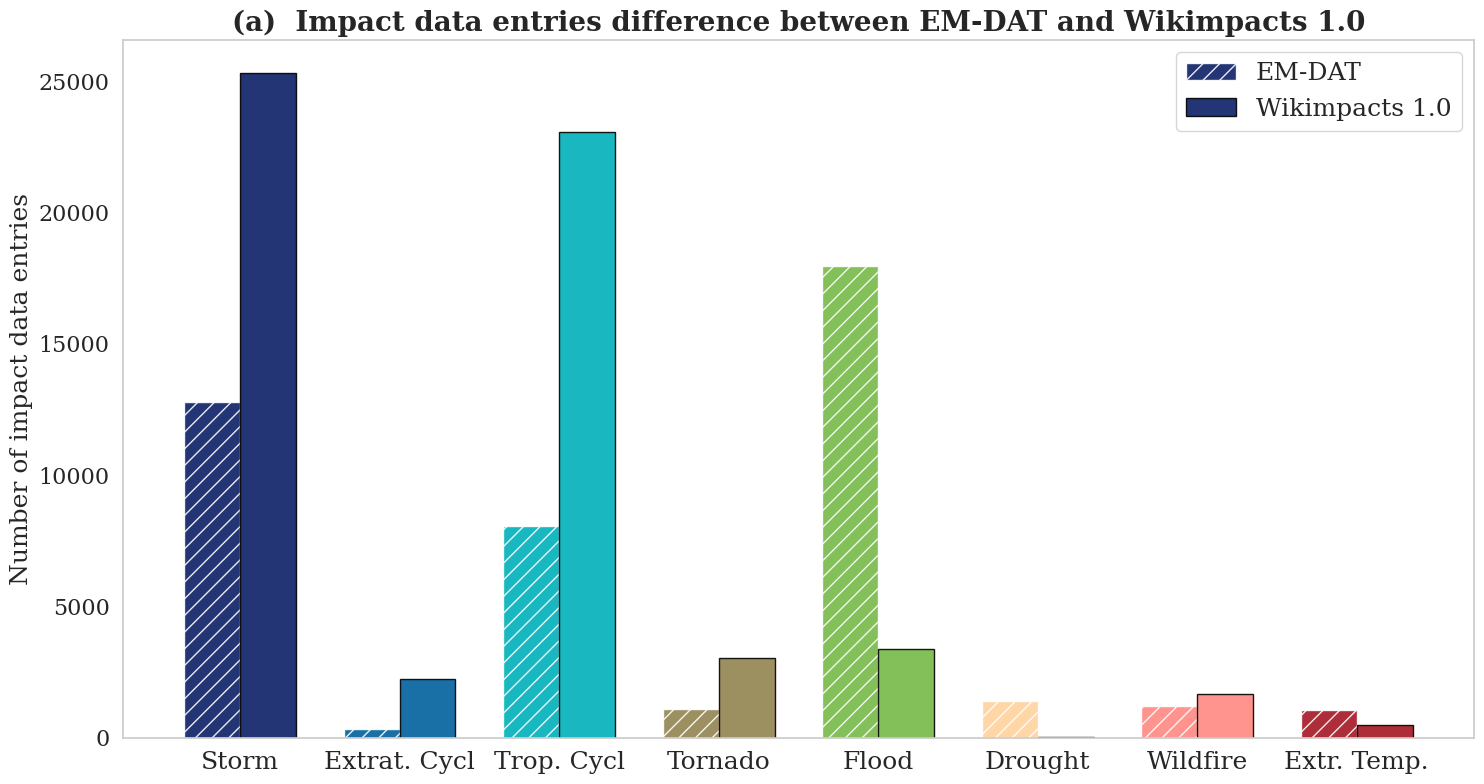

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data_emdat = {
    "Storm": 12783,
    "Extrat. Cycl": 330,
    "Trop. Cycl": 8085,
    "Tornado": 1087,
    "Flood": 17970,
    "Drought": 1389,
    "Wildfire": 1211,
    "Extr. Temp.": 1062,
}

data_wiki = {
    "Storm": 25320,
    "Extrat. Cycl": 2233,
    "Trop. Cycl": 23087,
    "Tornado": 3022,
    "Flood": 3389,
    "Drought": 19,
    "Wildfire": 1681,
    "Extr. Temp.": 473,
}


# Custom colors for each category
custom_colors = {
    "Flood": "#76b947",
    "Drought": "#FFD29D",
    "Wildfire": "#ff8882",
    "Tornado": "#918450",
    "Extrat. Cycl": "#00619c",
    "Trop. Cycl": "#00AFB9",
    "Extr. Temp.": "#A41623",
    "Storm": '#0b1f65',
}

# Use the order of data_emdat keys for consistent plotting
categories = list(data_emdat.keys())

# Extract values in the correct order
data_emdat_values = [data_emdat.get(category, 0) for category in categories]
data_wiki_values = [data_wiki.get(category, 0) for category in categories]

# Bar chart setup
x = np.arange(len(categories))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(15, 8))

# Plot EMDAT data with shade effect
bars_emdat = ax.bar(x - width/2, data_emdat_values, width, label='EM-DAT',
                    color=[custom_colors[cat] for cat in categories], hatch='//', alpha=0.9)

# Plot Wiki data with solid bars
bars_wiki = ax.bar(x + width/2, data_wiki_values, width, label='Wikimpacts 1.0',
                   color=[custom_colors[cat] for cat in categories], edgecolor="black", alpha=0.9)

# Labeling
ax.set_xlabel(None)
ax.set_ylabel("Number of impact data entries",fontsize=18)
ax.set_title("(a)  Impact data entries difference between EM-DAT and Wikimpacts 1.0",fontsize=20,fontweight="bold")
ax.set_xticks(x)
for size in ax.get_yticklabels():  
   
    size.set_fontsize('16')
ax.set_xticklabels(categories, ha="center",fontsize=18)
ax.grid(False)
ax.legend(fontsize=18)

# Display the plot
plt.tight_layout()
plt.savefig("/home/nl/Wikimpacts/Visualizations/em-datvs-wimpacts.png", dpi=300)
plt.show()


In [11]:
import geopandas as gpd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


# Count the frequency of each ISO code
iso_frequency = emdat_forvs['ISO'].value_counts()
# Convert to DataFrame and reset the index
iso_frequency_df = iso_frequency.reset_index()
iso_frequency_df.columns = ['ISO', 'Count']






In [14]:
import ast 
def flatten_and_parse(lst):
    """
    Recursively flattens a nested list and safely evaluates strings representing lists.
    """
    result = []
    for item in lst:
        if isinstance(item, list) or isinstance(item, np.ndarray):
            result.extend(flatten_and_parse(item))
        elif isinstance(item, str):
            # Try to parse the string as a list
            try:
                item_parsed = ast.literal_eval(item)
                if isinstance(item_parsed, list):
                    result.extend(flatten_and_parse(item_parsed))
                else:
                    result.append(str(item_parsed))
            except (ValueError, SyntaxError):
                result.append(item)
        else:
            result.append(str(item))
    return result

def count_events_per_admin_area_l3(df):
    """
    Counts the number of Main_Events per Administrative_Area.

    Args:
        df (pd.DataFrame): DataFrame containing 'Main_Event' and 'Administrative_Areas_GeoJson' columns.
    Returns:
        pd.DataFrame: DataFrame with 'Administrative_Area' and 'Count' columns.
    """
    # Step 1: Extract administrative area identifiers into a new column
    def extract_admin_areas(area_list):
        if area_list is None or (isinstance(area_list, float) and np.isnan(area_list)):
            return []
        if not isinstance(area_list, list):
            area_list = [area_list]
        # Remove NaN values
        area_list = [item for item in area_list if not pd.isnull(item)]
        if not area_list:
            return []
        # Flatten and parse the list
        area_list = flatten_and_parse(area_list)
        return area_list
    # Check the data type of the column
    #print(type(df["Administrative_Areas_GeoJson"].iloc[0]))  # Check the first row to see the type of data

    df["GID"] = df["Administrative_Area_GID"].apply(extract_admin_areas)

    # Step 2: Explode the DataFrame so each administrative area has its own row
    df_exploded = df.explode("GID")

    # Step 3.1: Group by the administrative areas and count the number of Main_Event occurrences
    event_count_per_admin_area = df_exploded.groupby("GID")["Main_Event"].count().reset_index()

    


    # Step 4: Rename columns for clarity
    event_count_per_admin_area.columns = ["ISO", "Count"]

    return event_count_per_admin_area


# Convert 'Start_Date_Year' to numeric, coercing errors to NaN for non-numeric values
L3_main_event['Start_Date_Year_New'] = pd.to_numeric(L3_main_event['Start_Date_Year'], errors='coerce')

# Filter the DataFrame for years >= 1900
filtered_L3 = L3_main_event[L3_main_event["Start_Date_Year_New"] >= 1900]

# Count the frequency for filtered_L2 and ensure it's a DataFrame
filtered_L3_frequency = count_events_per_admin_area_l3(filtered_L3)





/tmp/ipykernel_10249/3314123949.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GID"] = df["Administrative_Area_GID"].apply(extract_admin_areas)


In [15]:
# Set 'ISO' as the index for alignment
filtered_L3_frequency = filtered_L3_frequency.set_index('ISO')
iso_frequency_df = iso_frequency_df.set_index('ISO')

# Calculate the difference, aligning by 'ISO' and filling NaNs with 0
difference = filtered_L3_frequency.subtract(iso_frequency_df, fill_value=0)

# Reset index if needed
difference = difference.reset_index()


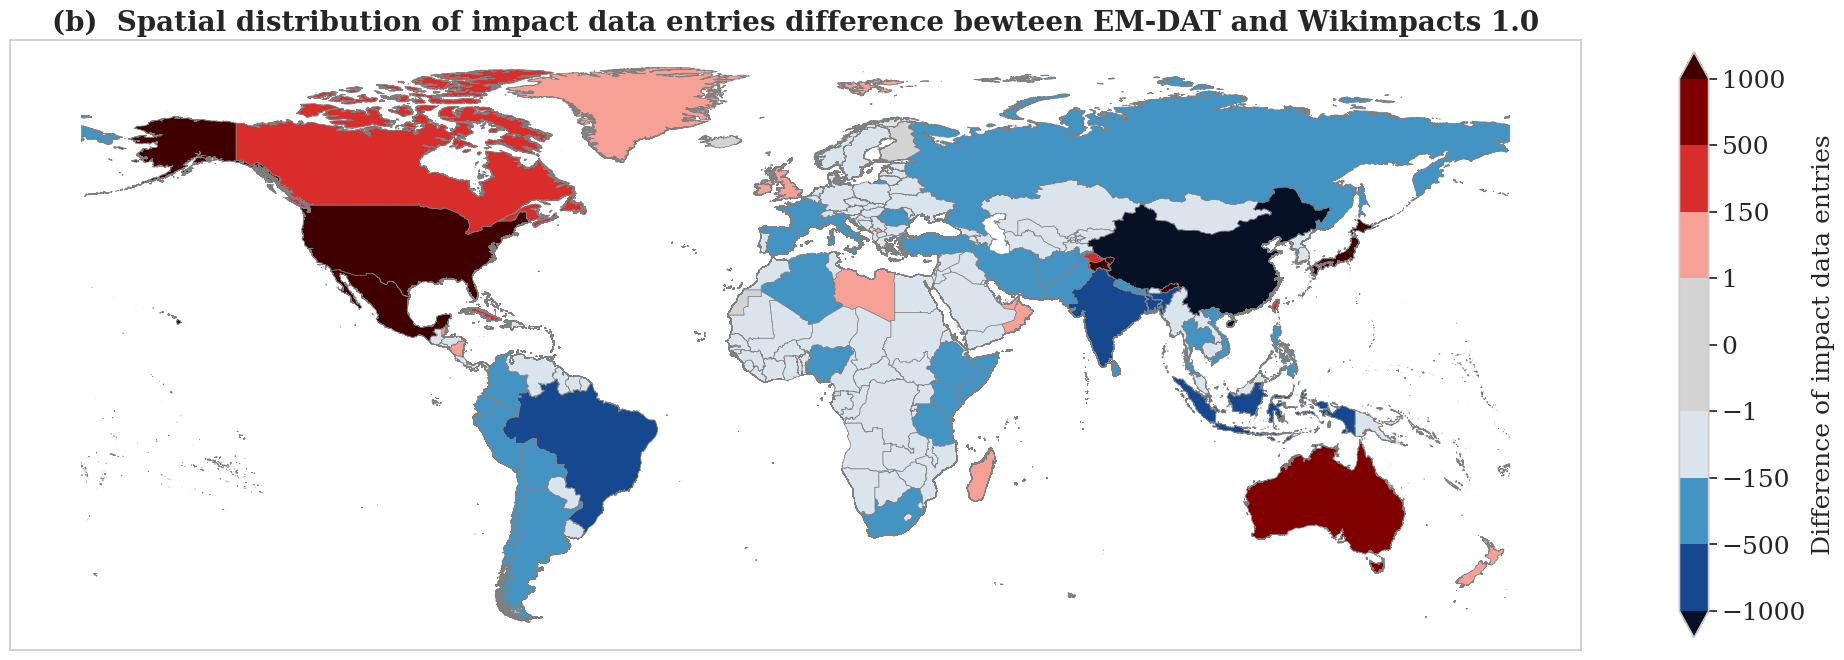

In [48]:
# Assuming the ISO column in 'world' is called 'GID_0'
iso_column_name = 'GID_0'

# Perform the merge, aligning the 'ISO' column in 'difference' with 'GID_0' in 'world'
merged = world.merge(difference, left_on=iso_column_name, right_on='ISO', how='left')


#[-1075.0, -510.0, -86.0, 518.0, 1988.0, 7873.0]
# Define custom breaks
breaks = [ -1000, -500, -150, -1,0,1, 150, 500, 1000]




# Define the custom colormap

cmap_colors = [
    '#071125',  # Dark blue for large negative values
    '#16488f',
    '#4393c3',  # Medium blue

   '#d9e4ec',  # Additional lighter blue for smoother transition
    '#D3D3D3',  # Neutral grey for zero
    '#D3D3D3',  # Neutral grey for zero
    
   '#f6a096',  # Light salmon
   
    '#d92d2b',  # Strong red
    '#800000',  # Vivid red
    '#400000'   # Dark red for large positive values
]




cmap = mcolors.ListedColormap(cmap_colors)
norm = mcolors.BoundaryNorm(boundaries=breaks, ncolors=len(cmap_colors),extend='both')

# Plotting the world map with merged data
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Plotting the merged GeoDataFrame with correct column and colormap
#merged.plot(column='frequency', ax=ax, legend=True, cmap=cmap, norm=norm, edgecolor='gray',linewidth=0.5)

merged.plot(column='Count', ax=ax, cmap=cmap, norm=norm, edgecolor='gray',linewidth=0.5)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Required for ScalarMappable to work
cbar = fig.colorbar(sm, ax=ax, shrink=0.4)
cbar.ax.tick_params(labelsize=18)  # Set font size for tick labels
cbar.set_label("Difference of impact data entries",fontsize=18)
plt.xticks([])
plt.yticks([])
# Add title and show plot
plt.title('(b)  Spatial distribution of impact data entries difference bewteen EM-DAT and Wikimpacts 1.0',fontsize=20, fontweight="bold")
plt.tight_layout()
plt.savefig("/home/nl/Wikimpacts/Visualizations/em-datvs-wimpacts-spatial.png", dpi=300)
plt.show()
